In [1]:
# Special functions and optimizations
from scipy.special import gamma, kv  # Bessel function and gamma function
from scipy.stats import multivariate_normal  # Simulation
from scipy.optimize import minimize
from scipy.spatial.distance import cdist  # For space and time distance
from scipy.spatial import distance  # Find closest spatial point
from scipy.optimize import differential_evolution

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import torch
# Type hints
from typing import Callable, Union, Tuple

import os
# Add your custom path
import sys
sys.path.append("/cache/home/jl2815/tco")

# Custom imports
from GEMS_TCO import orbitmap 
from GEMS_TCO import kernels 
from GEMS_TCO import evaluate
from GEMS_TCO import load_data_local_computer

import pickle
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import pandas as pd

import matplotlib.transforms as transforms

# Summary

We will explore data on an hourly scale. ```The cyclic pattern``` shown in the ```semivariograms``` indicates that we should fit the data with a model that can explain this cyclic pattern.

Secondly, ```asymmetric cross-variograms``` on some days imply that there is ```space and time interaction```, hence we should consider a non-separable model.

Lastly, ```latitude-sliced``` data shows ```spatial non-stationarity```. I plan to ```detrend for 5x10 spatial points``` in the N5N10 E110E120 region.

## Quick load from Amarel

In [7]:
input_path = "/Users/joonwonlee/Documents/GEMS_TCO-1/GEMS_TCO_EDA/outputs"
input_filename = "empirical_n135_45_sem_20000_july24.pkl"
    
input_filepath = os.path.join(input_path, input_filename)
# Load pickle
with open(input_filepath, 'rb') as pickle_file:
    d135_45_20000= pickle.load(pickle_file)


input_filename = "empirical_n45_135_sem_20000_july24.pkl"
    
input_filepath = os.path.join(input_path, input_filename)
# Load pickle
with open(input_filepath, 'rb') as pickle_file:
    dn45_n135_20000= pickle.load(pickle_file)



input_filename = "empirical_lat_sem_20000_july24.pkl"
    
input_filepath = os.path.join(input_path, input_filename)
# Load pickle
with open(input_filepath, 'rb') as pickle_file:
    d_lat_20000= pickle.load(pickle_file)


input_filename = "empirical_lon_sem_20000_july24.pkl"
    
input_filepath = os.path.join(input_path, input_filename)
# Load pickle
with open(input_filepath, 'rb') as pickle_file:
    d_lon_20000= pickle.load(pickle_file)



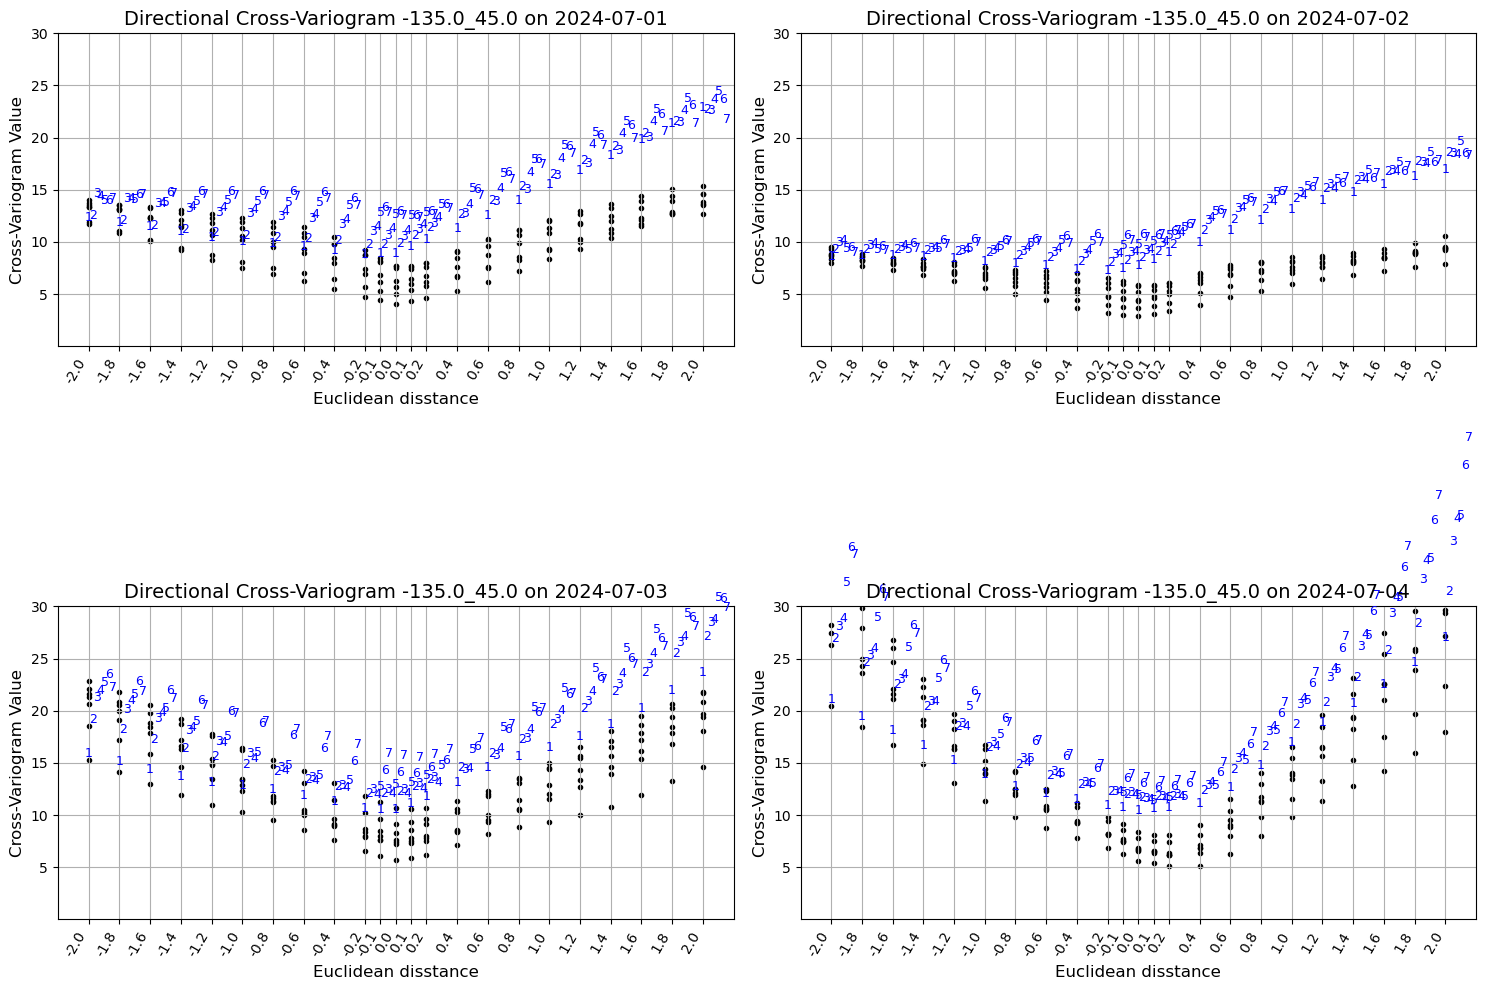

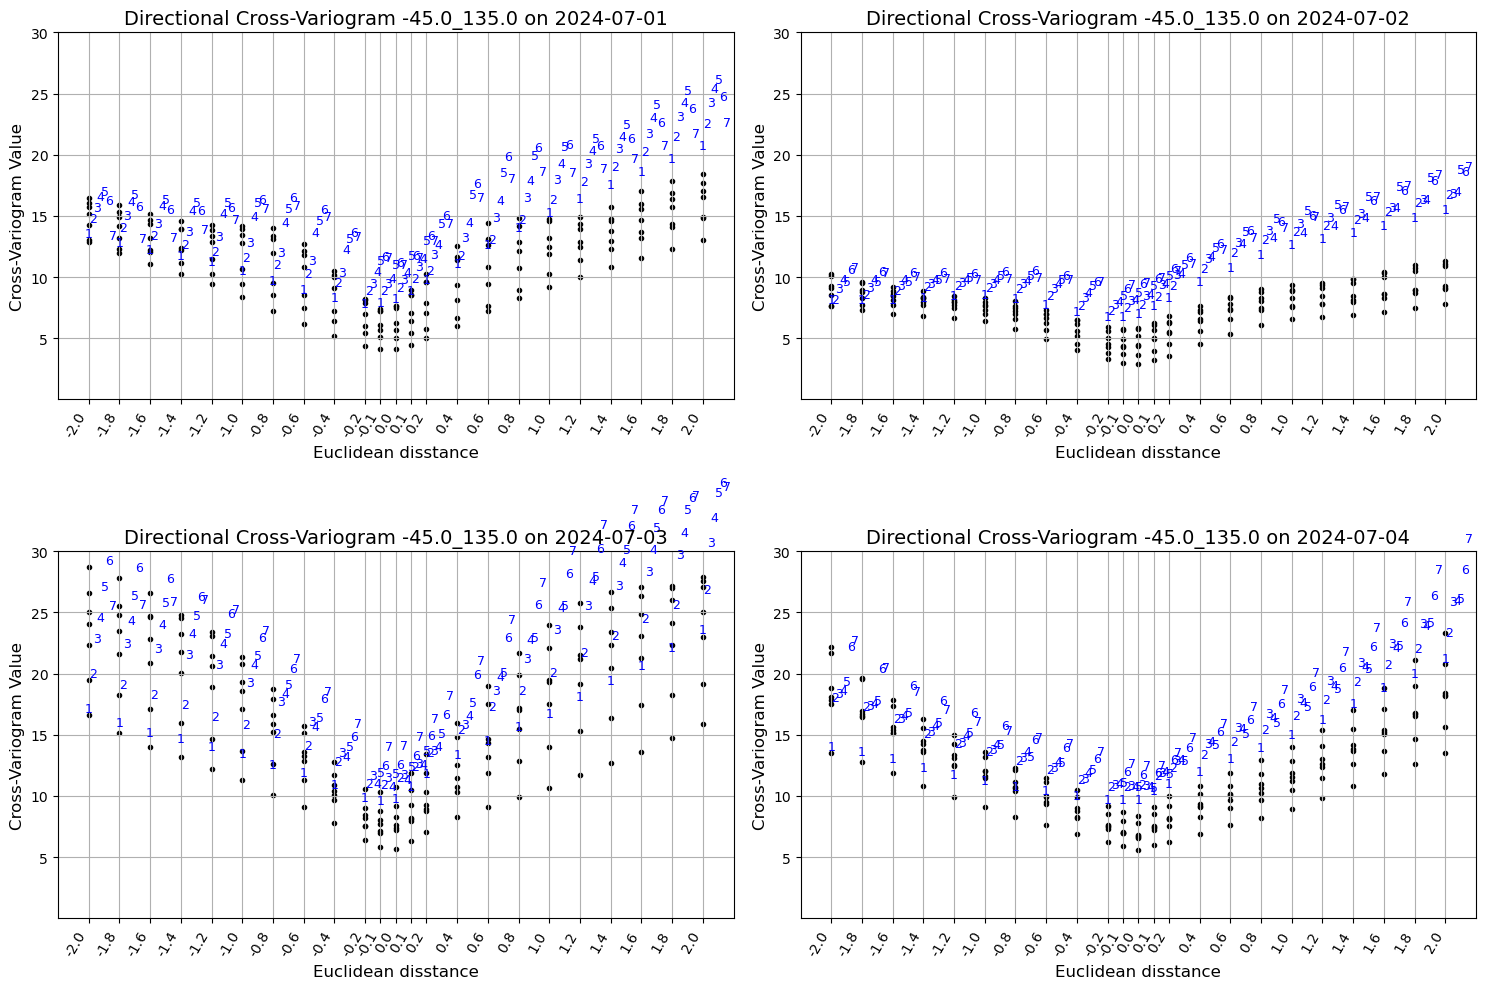

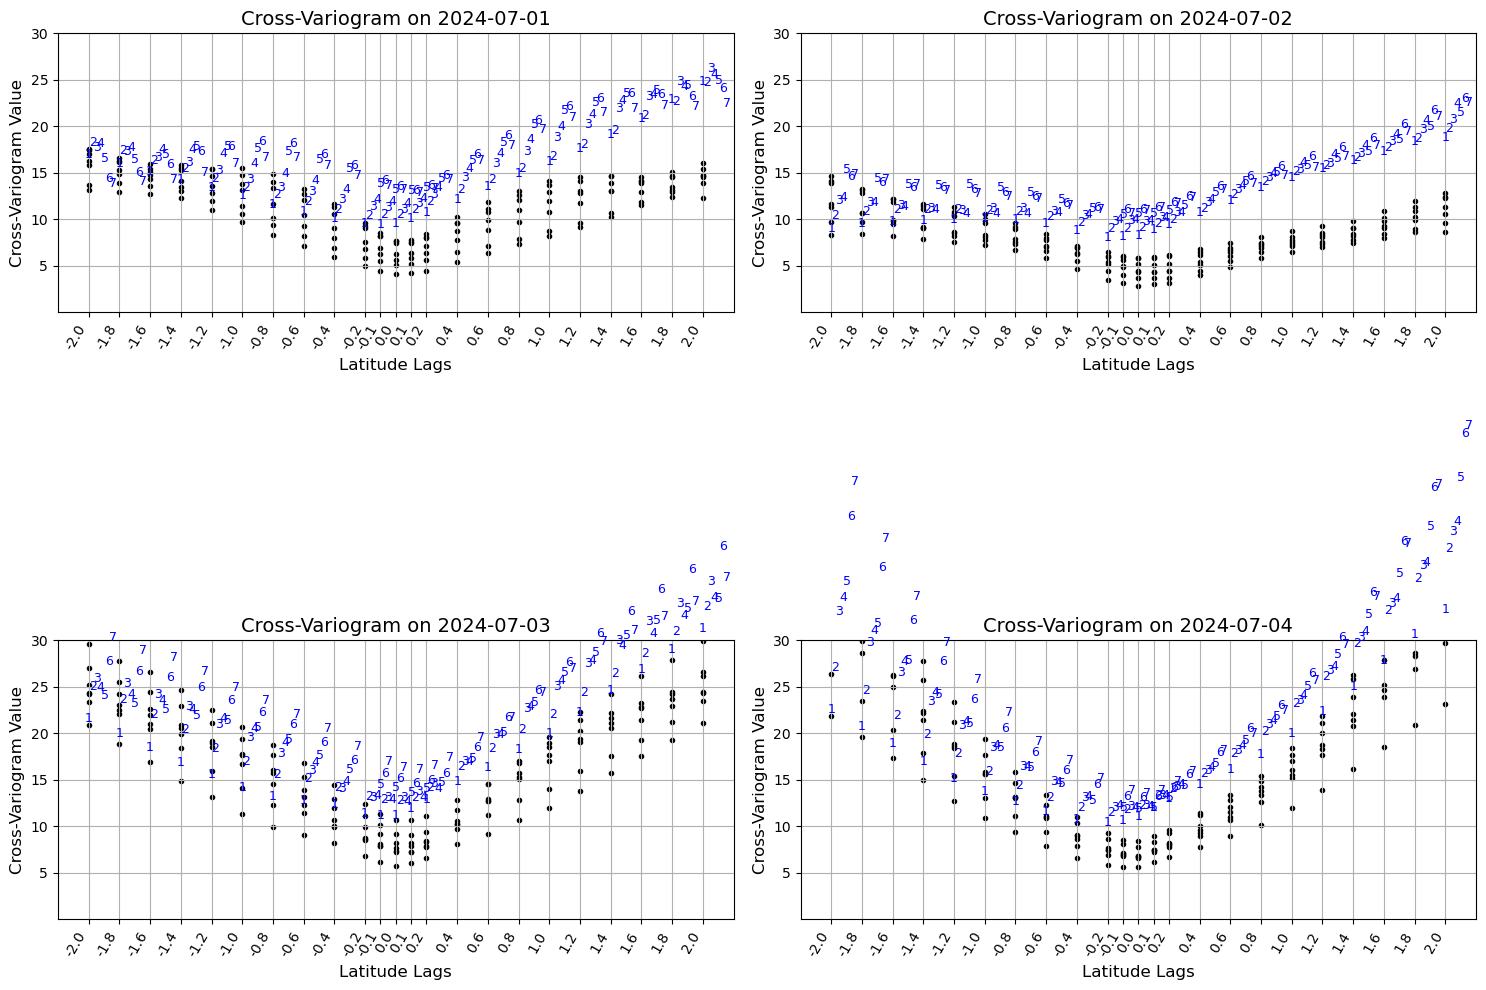

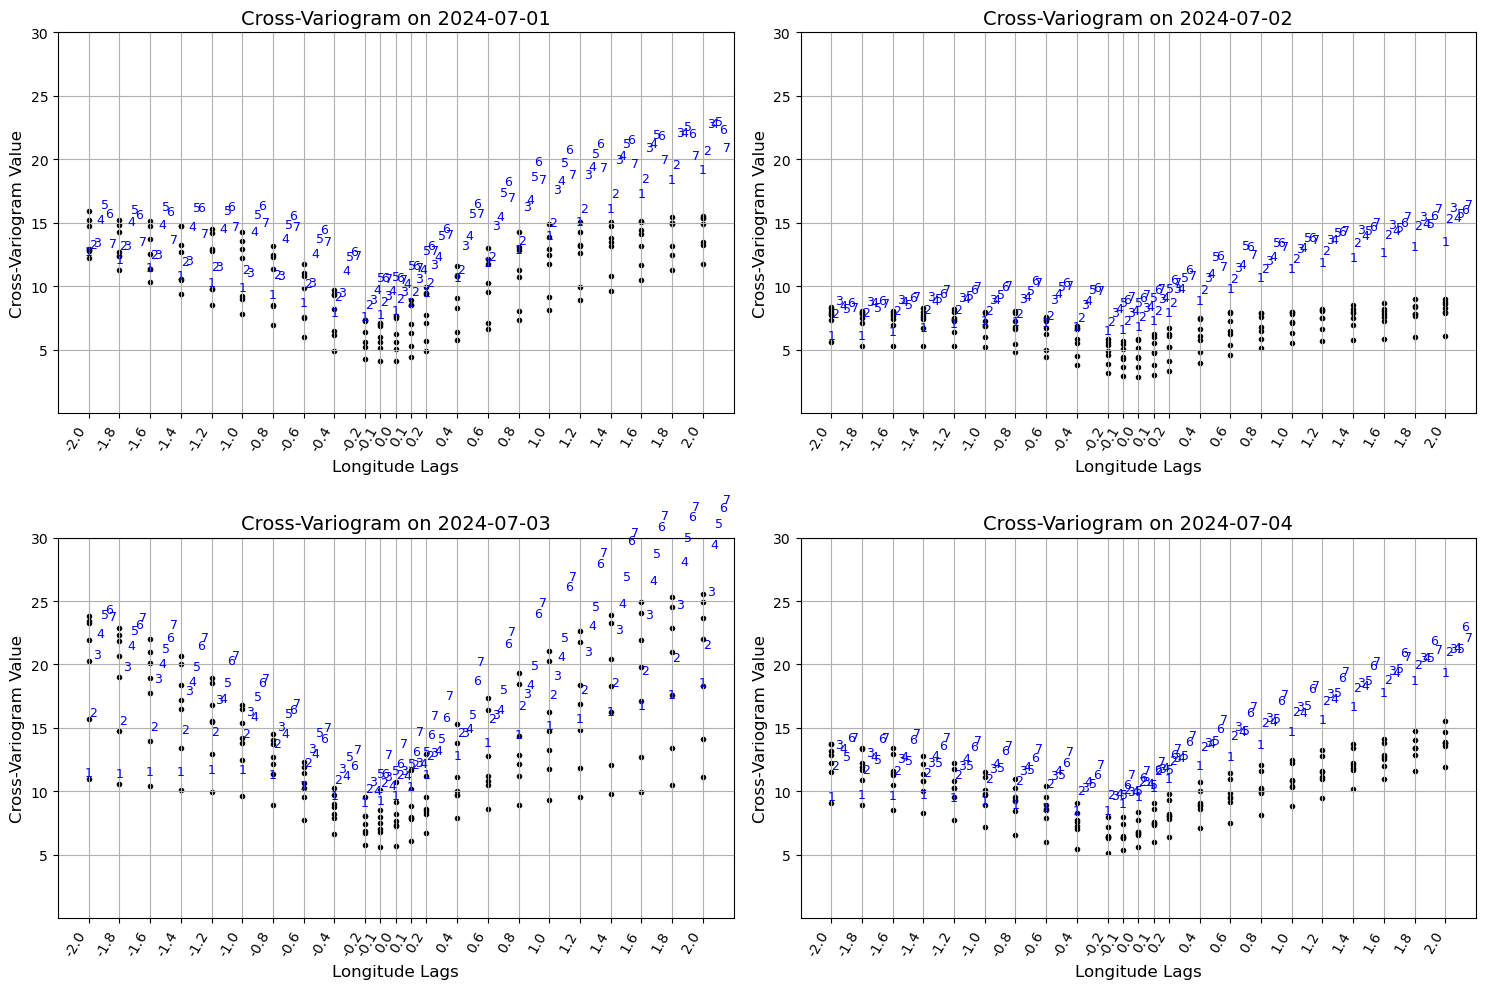

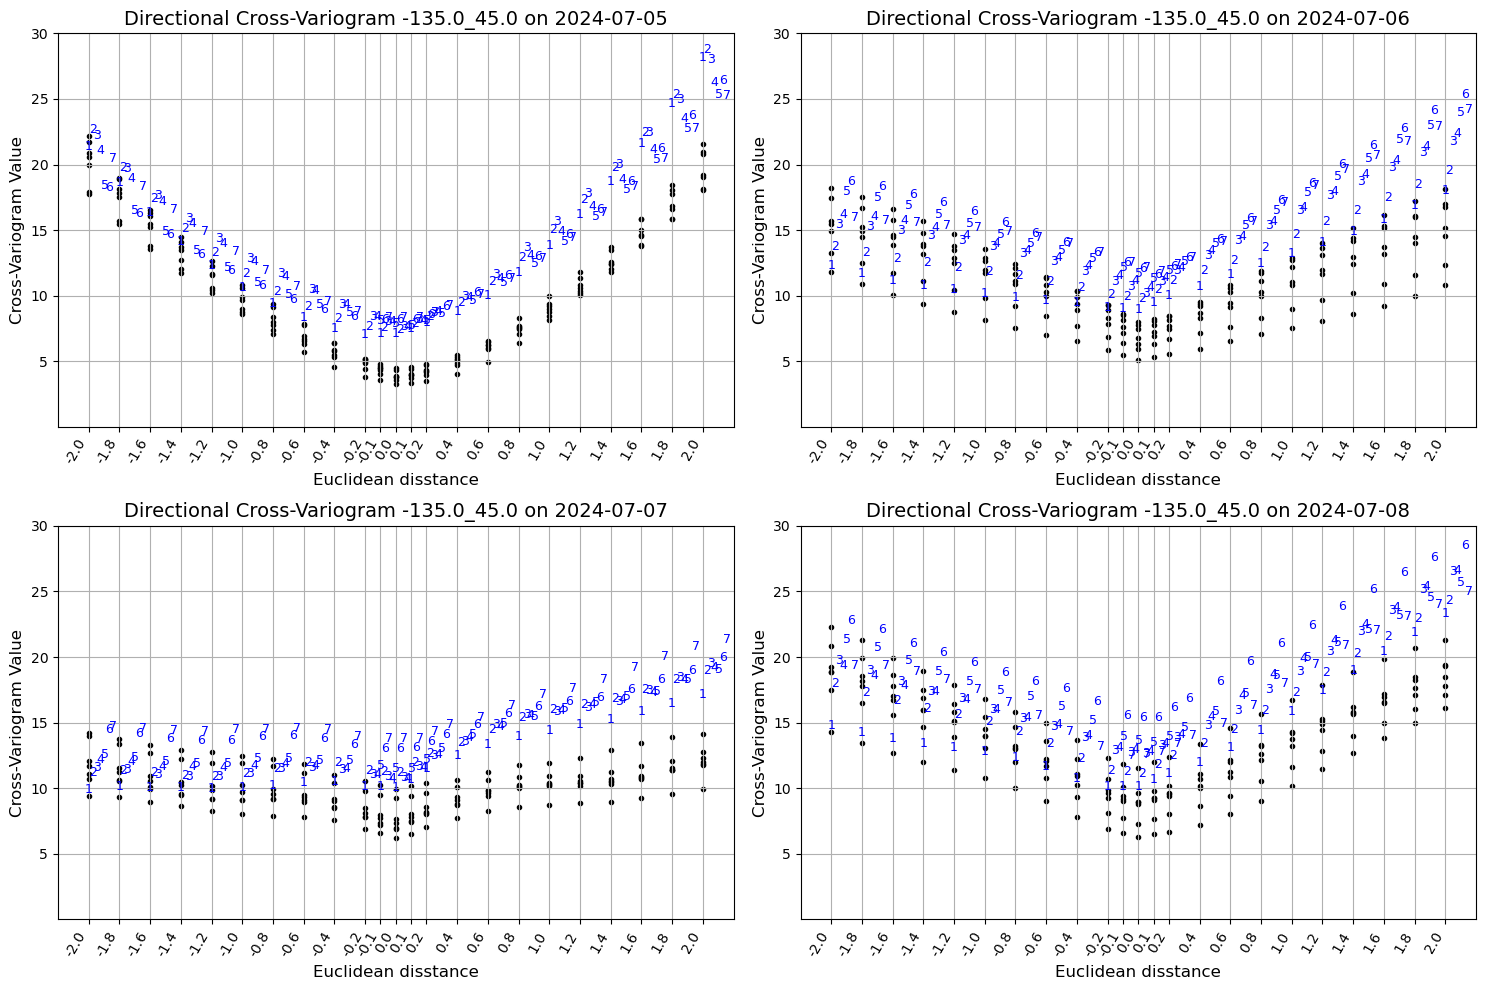

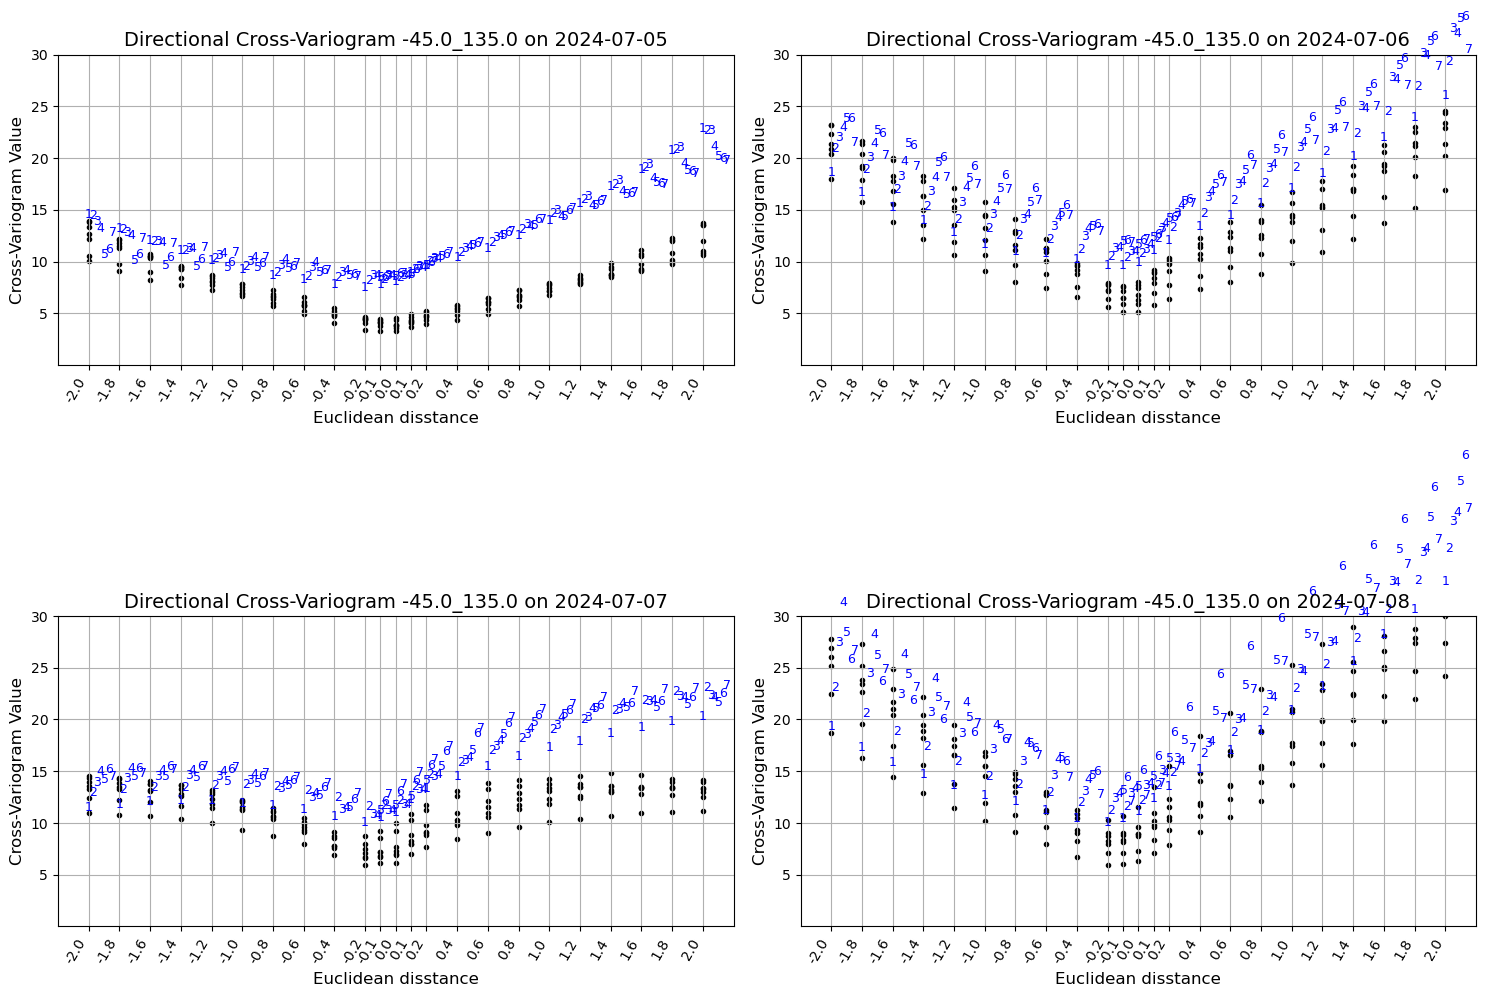

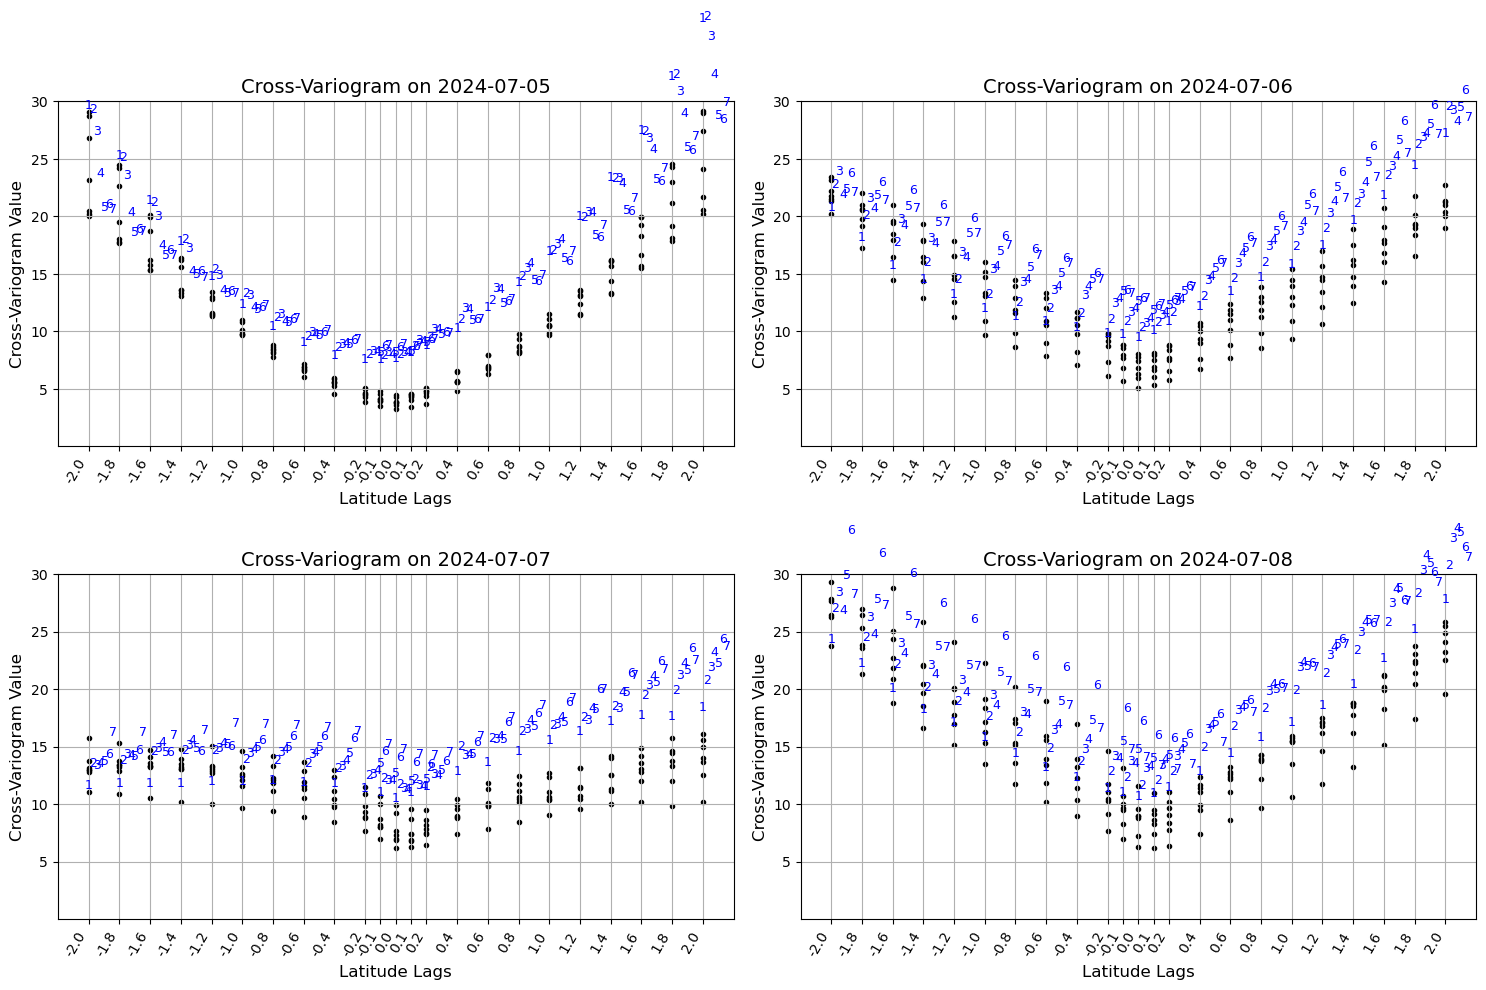

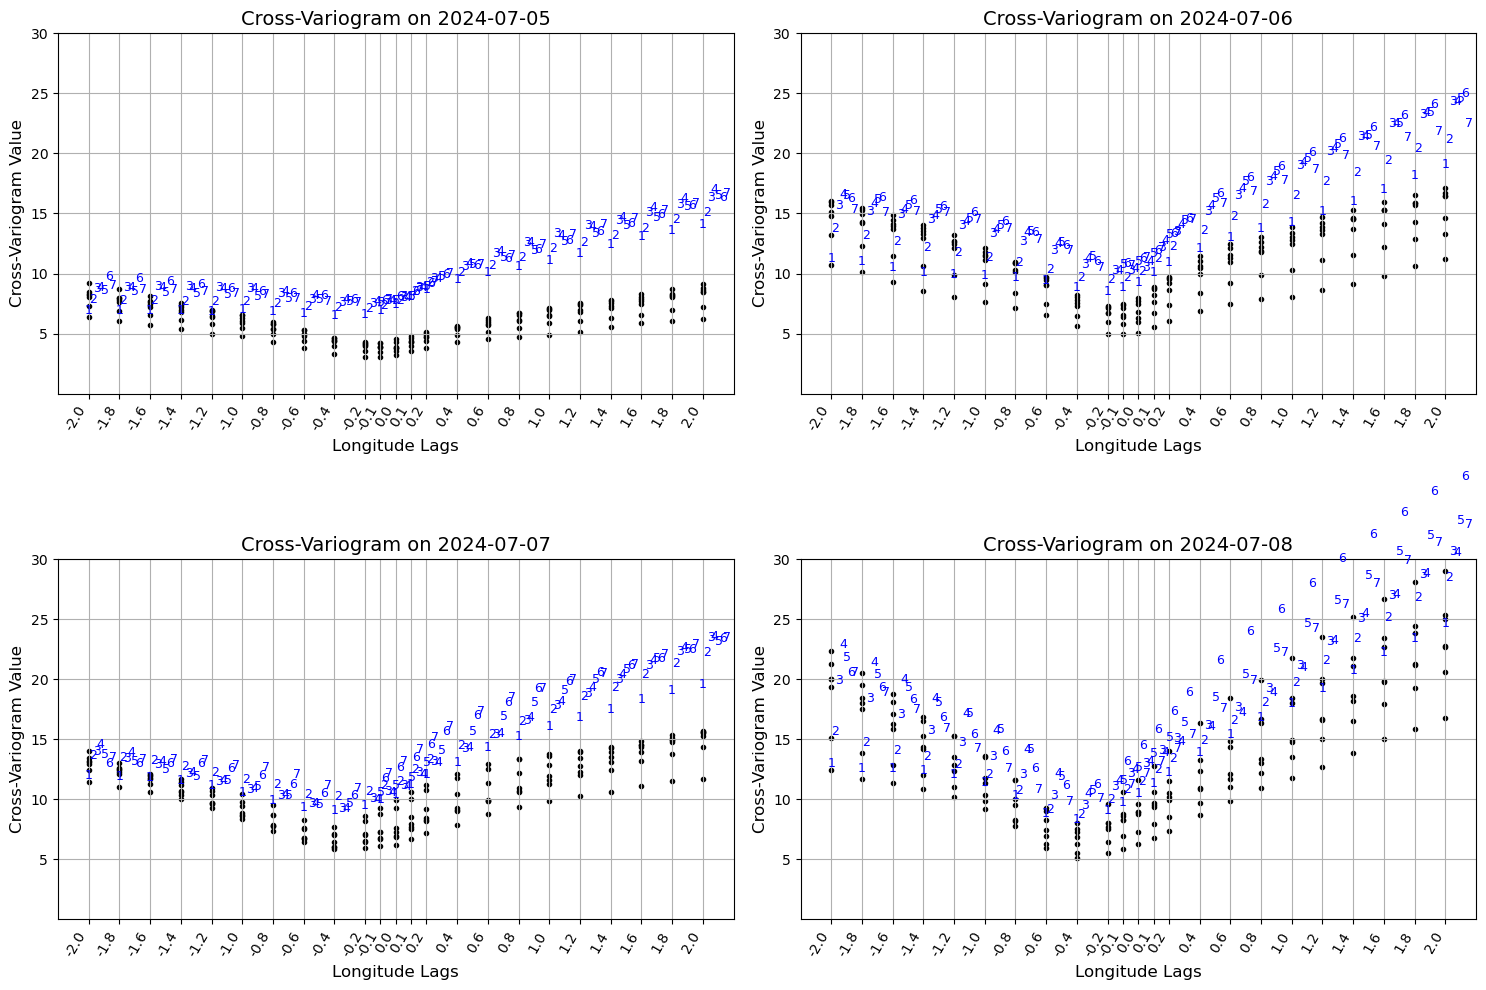

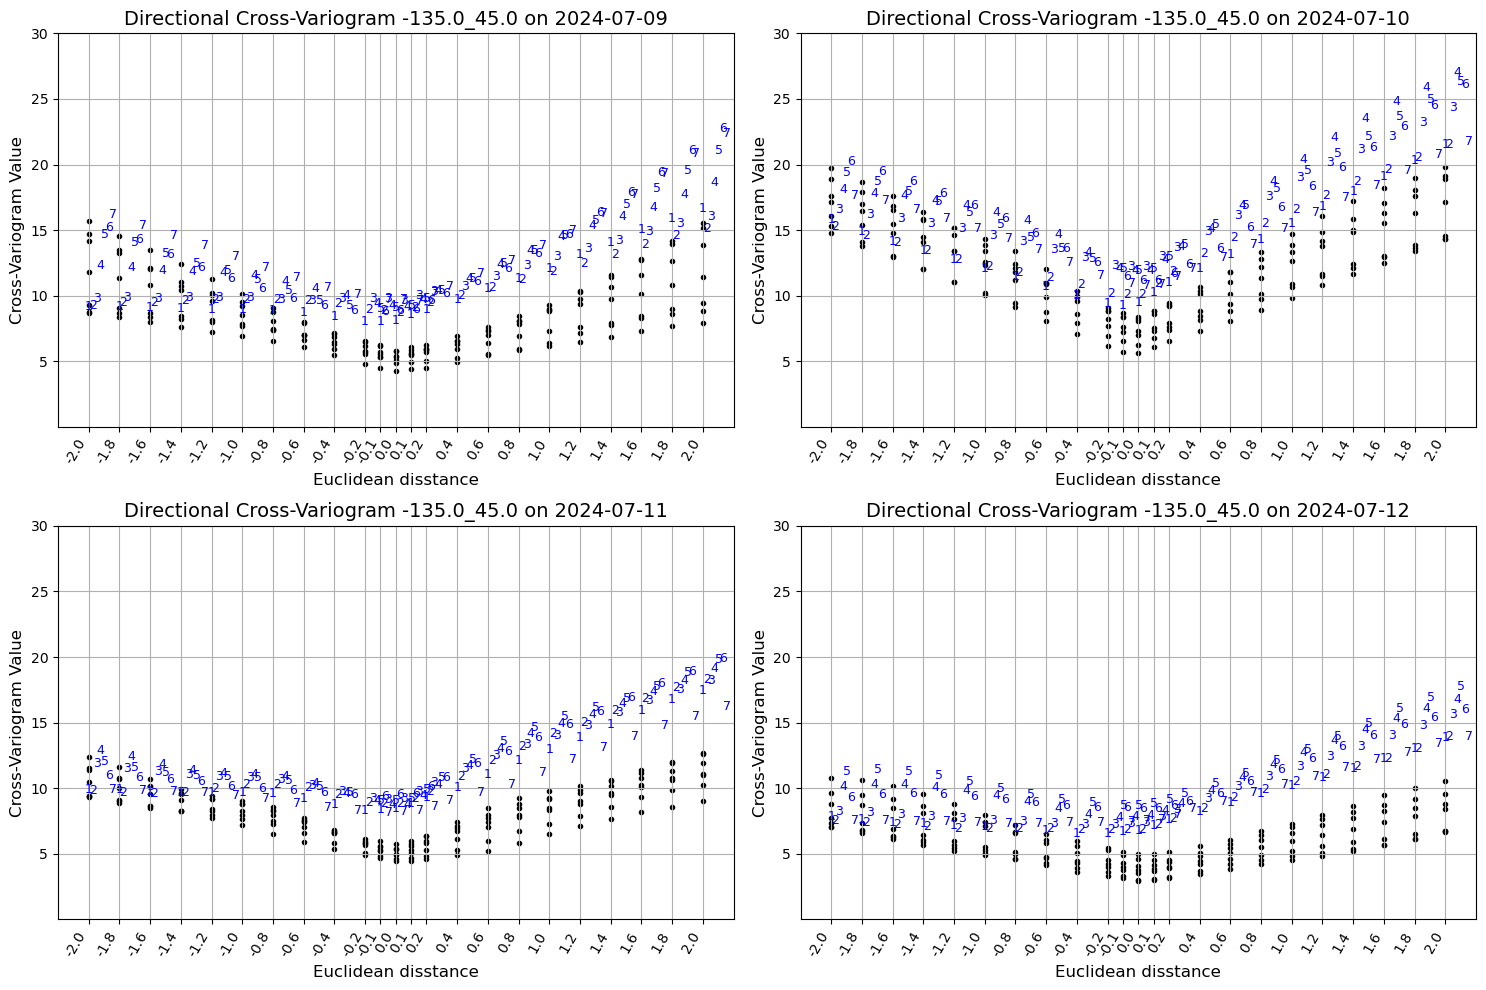

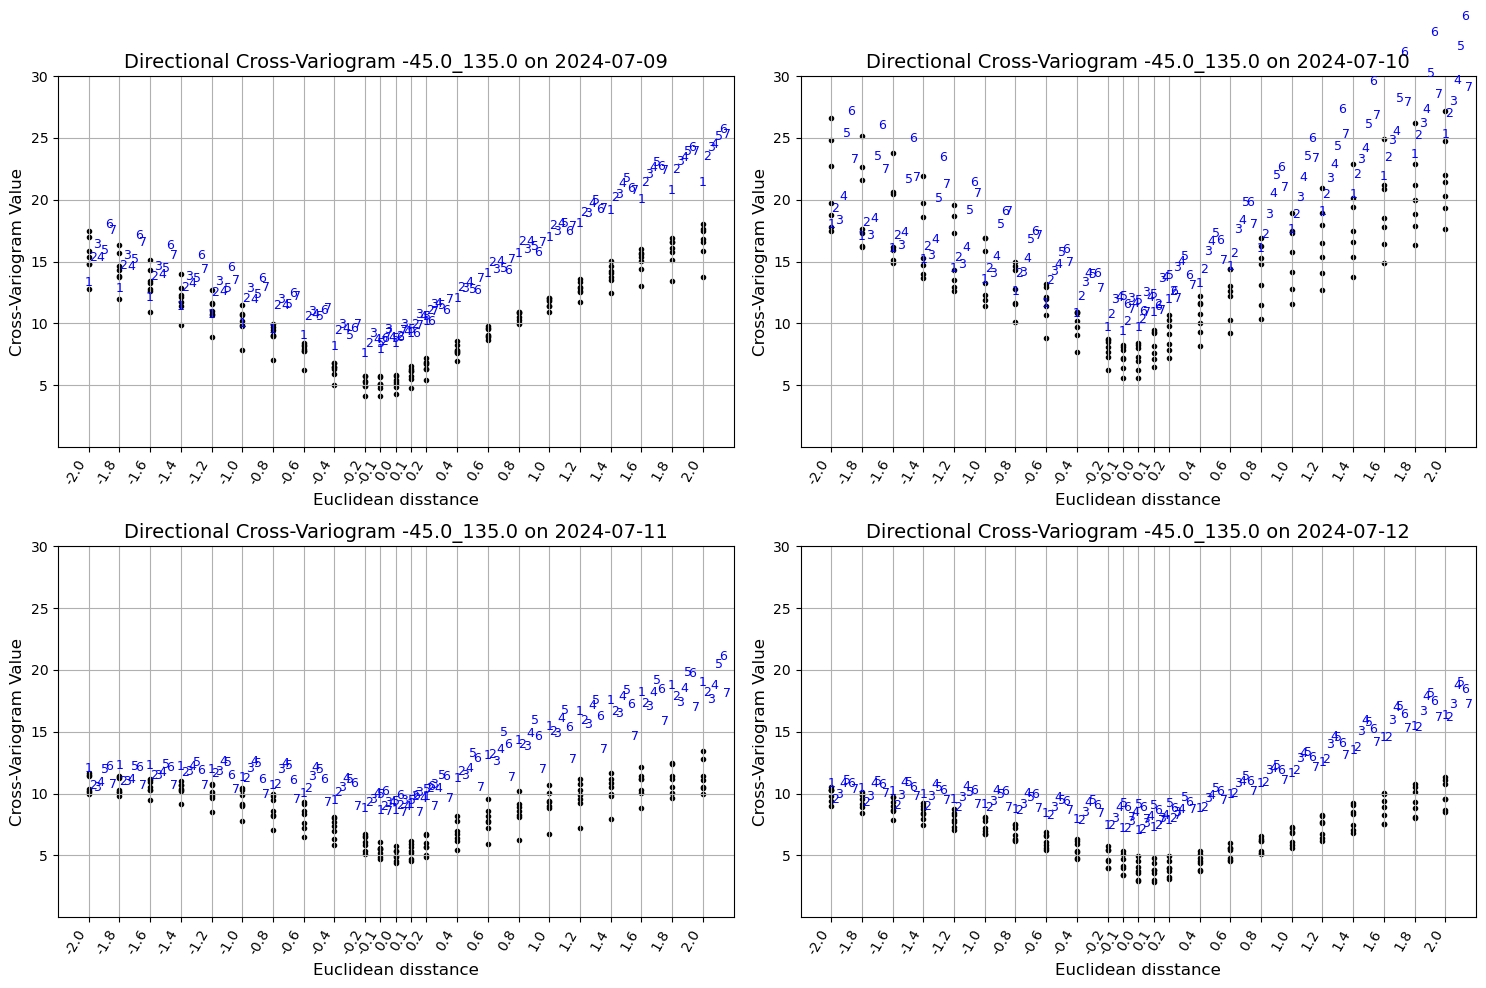

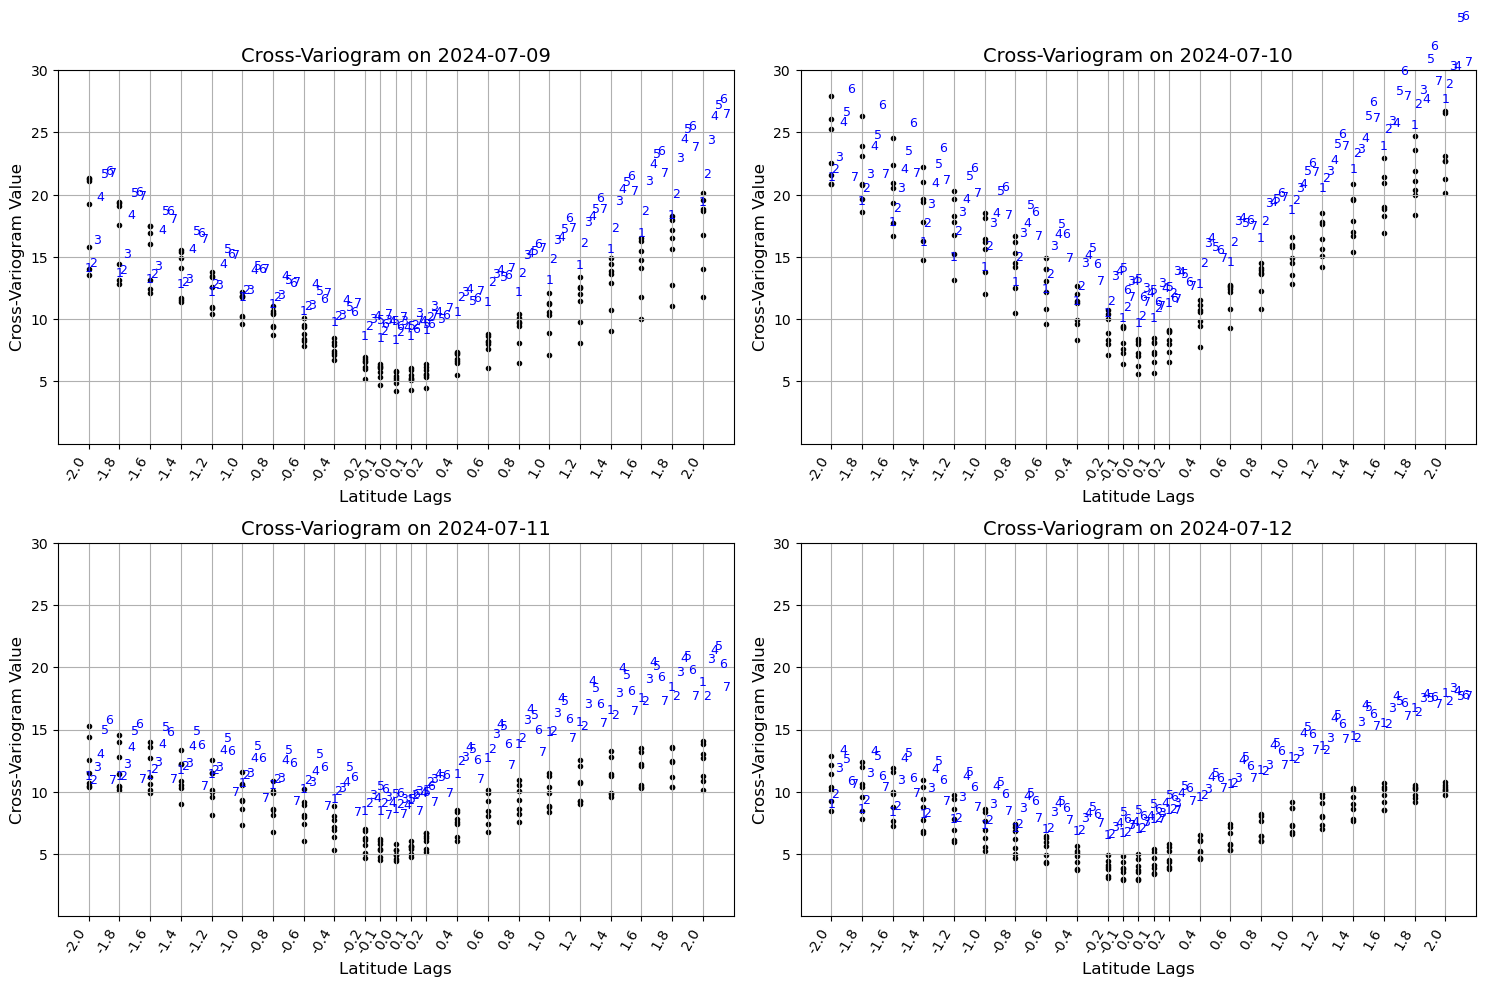

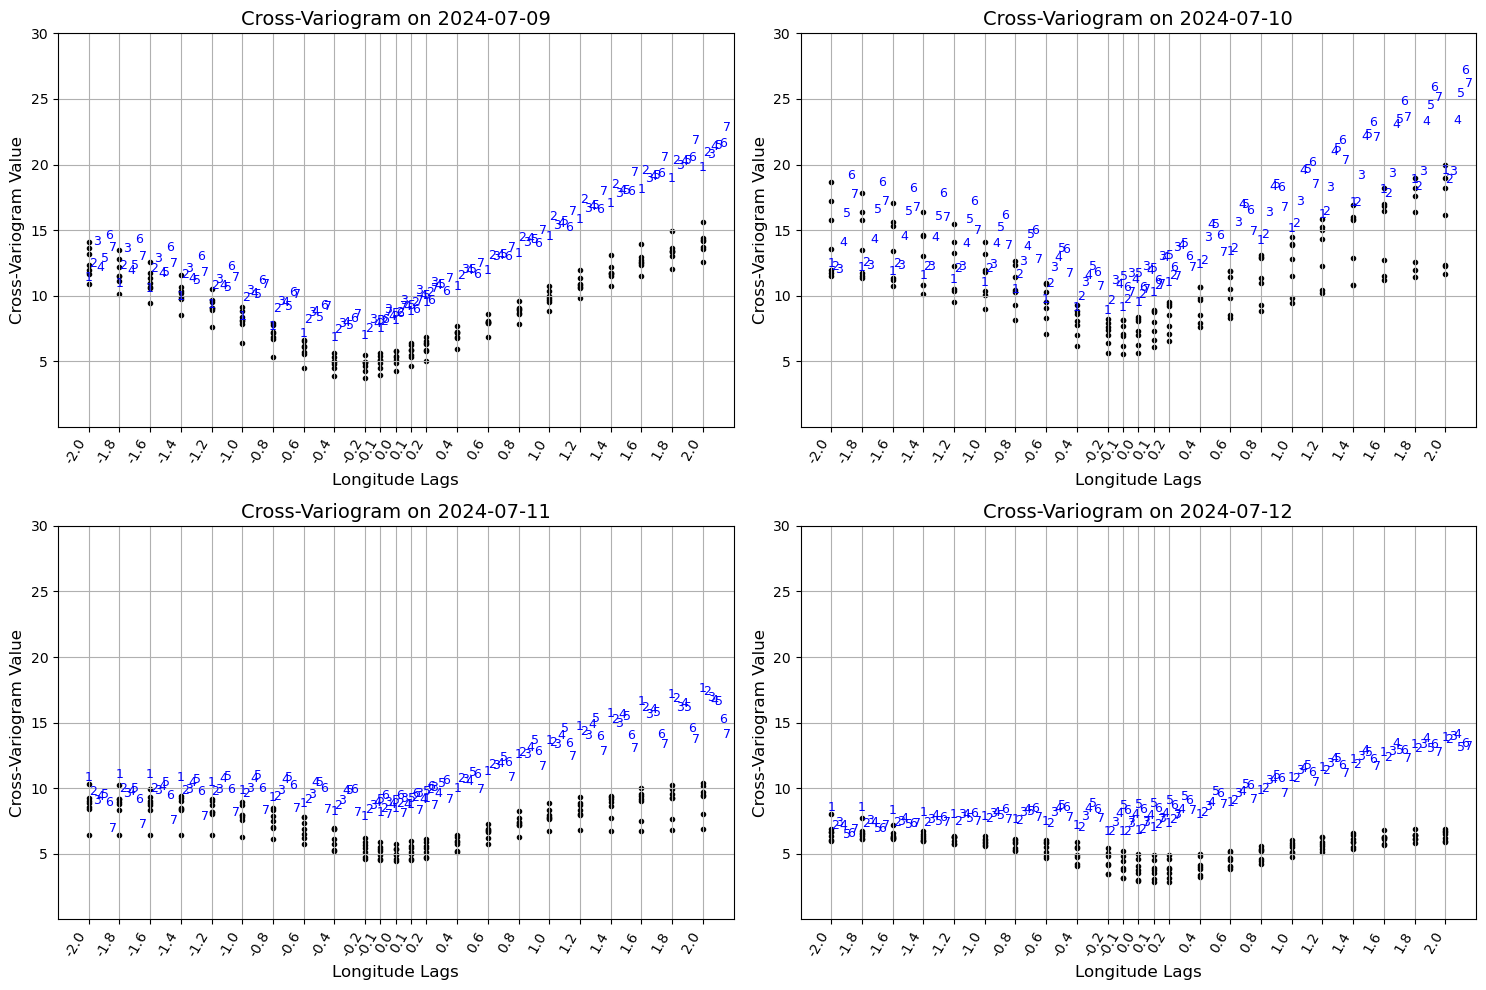

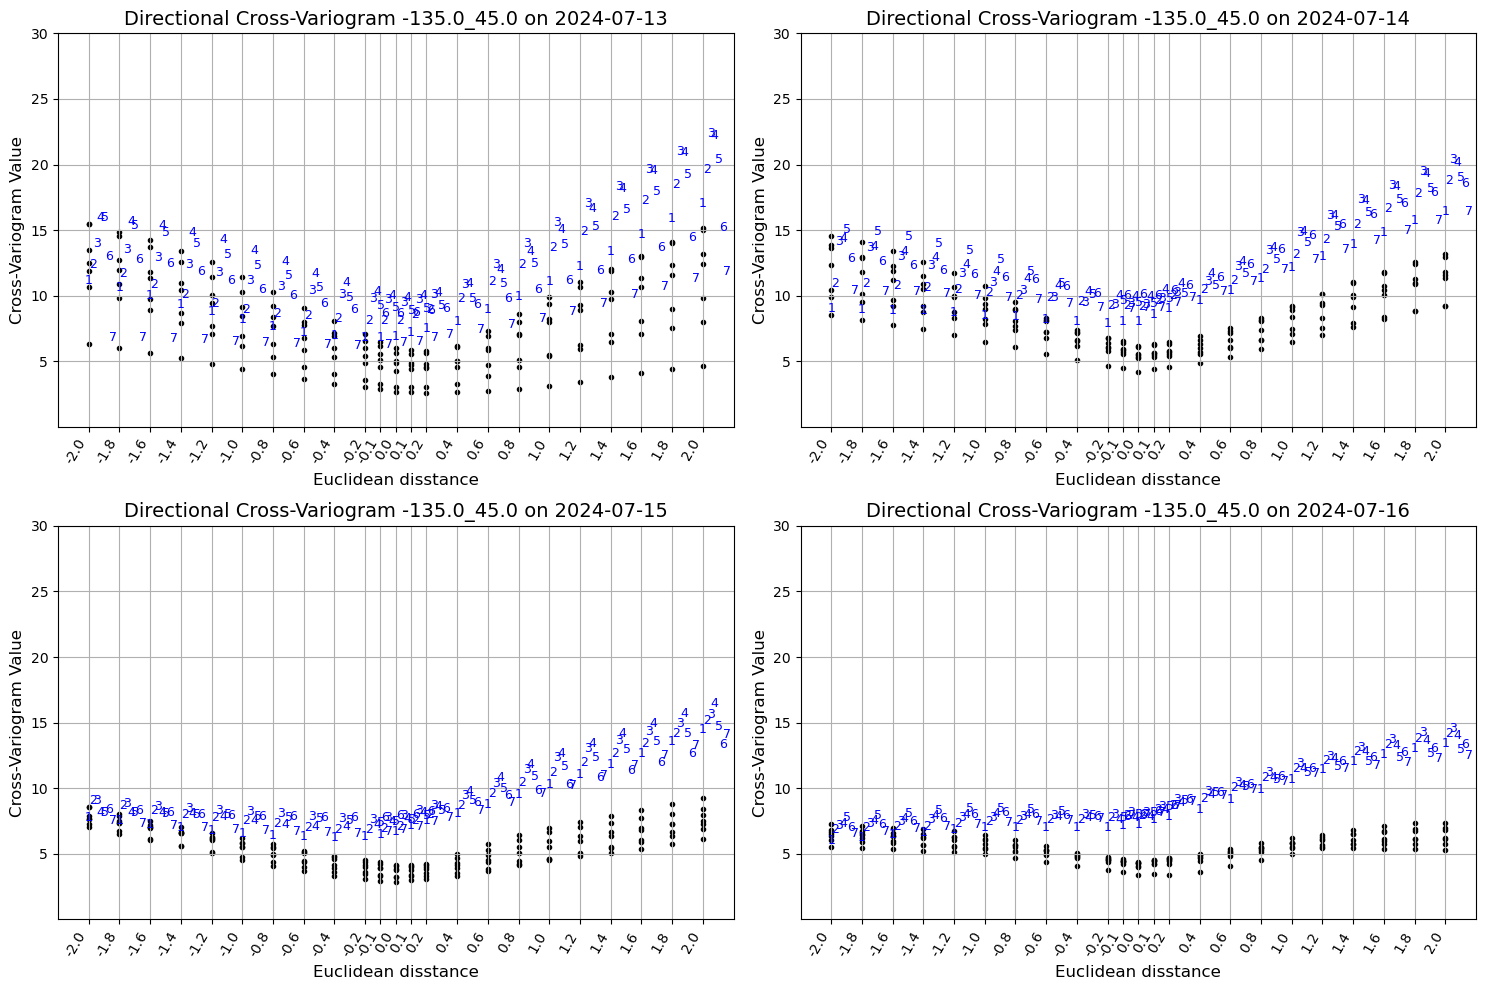

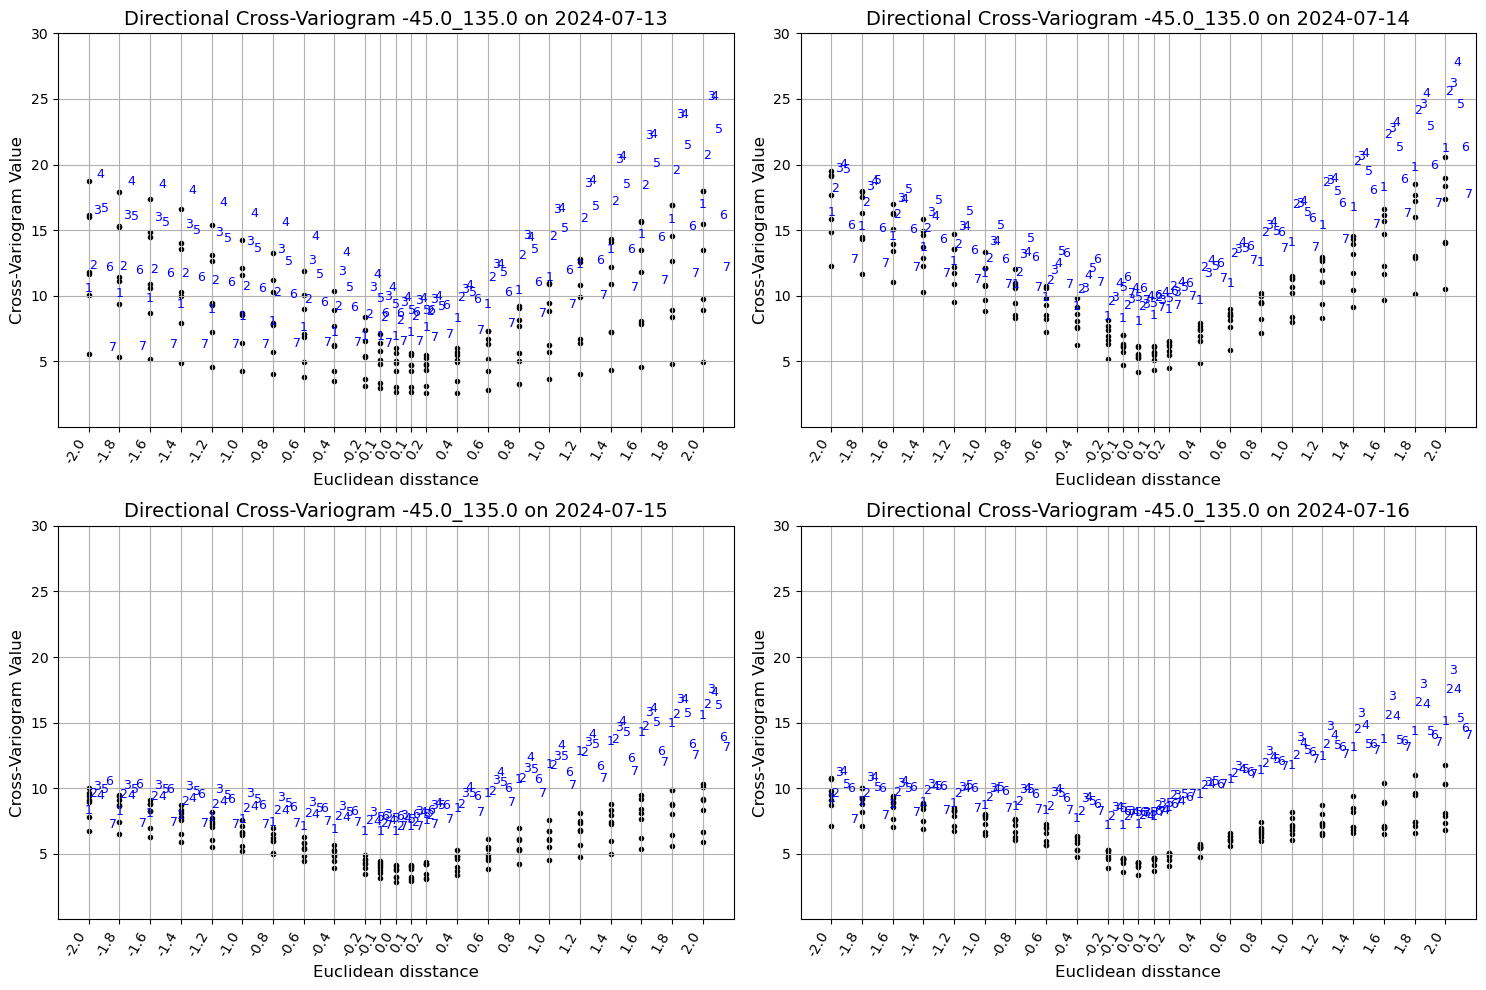

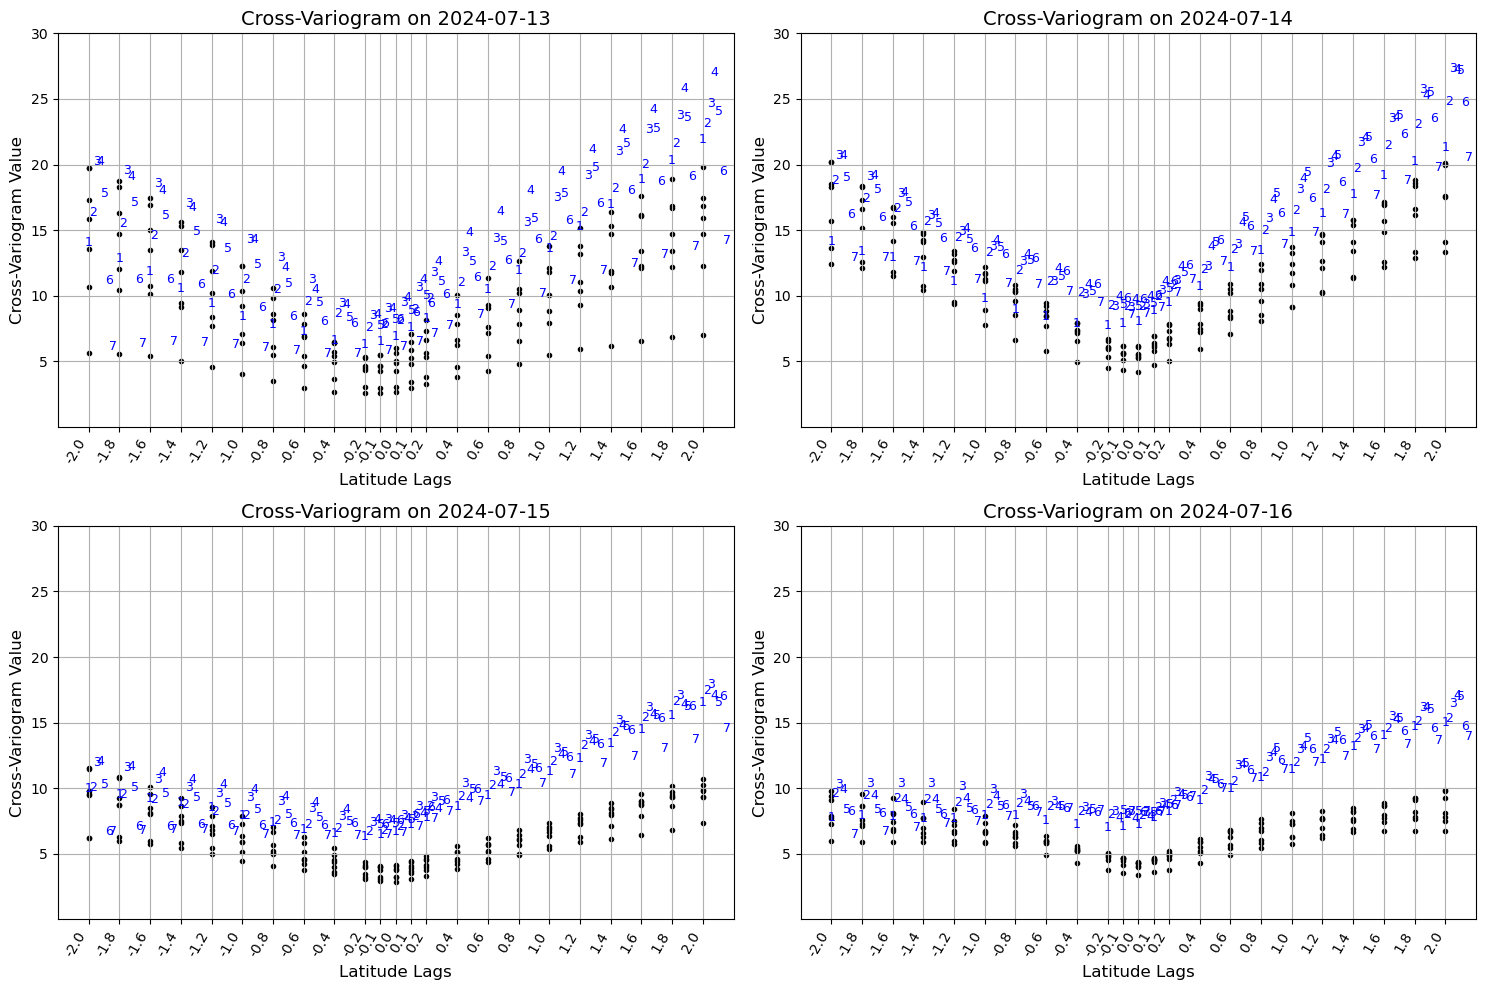

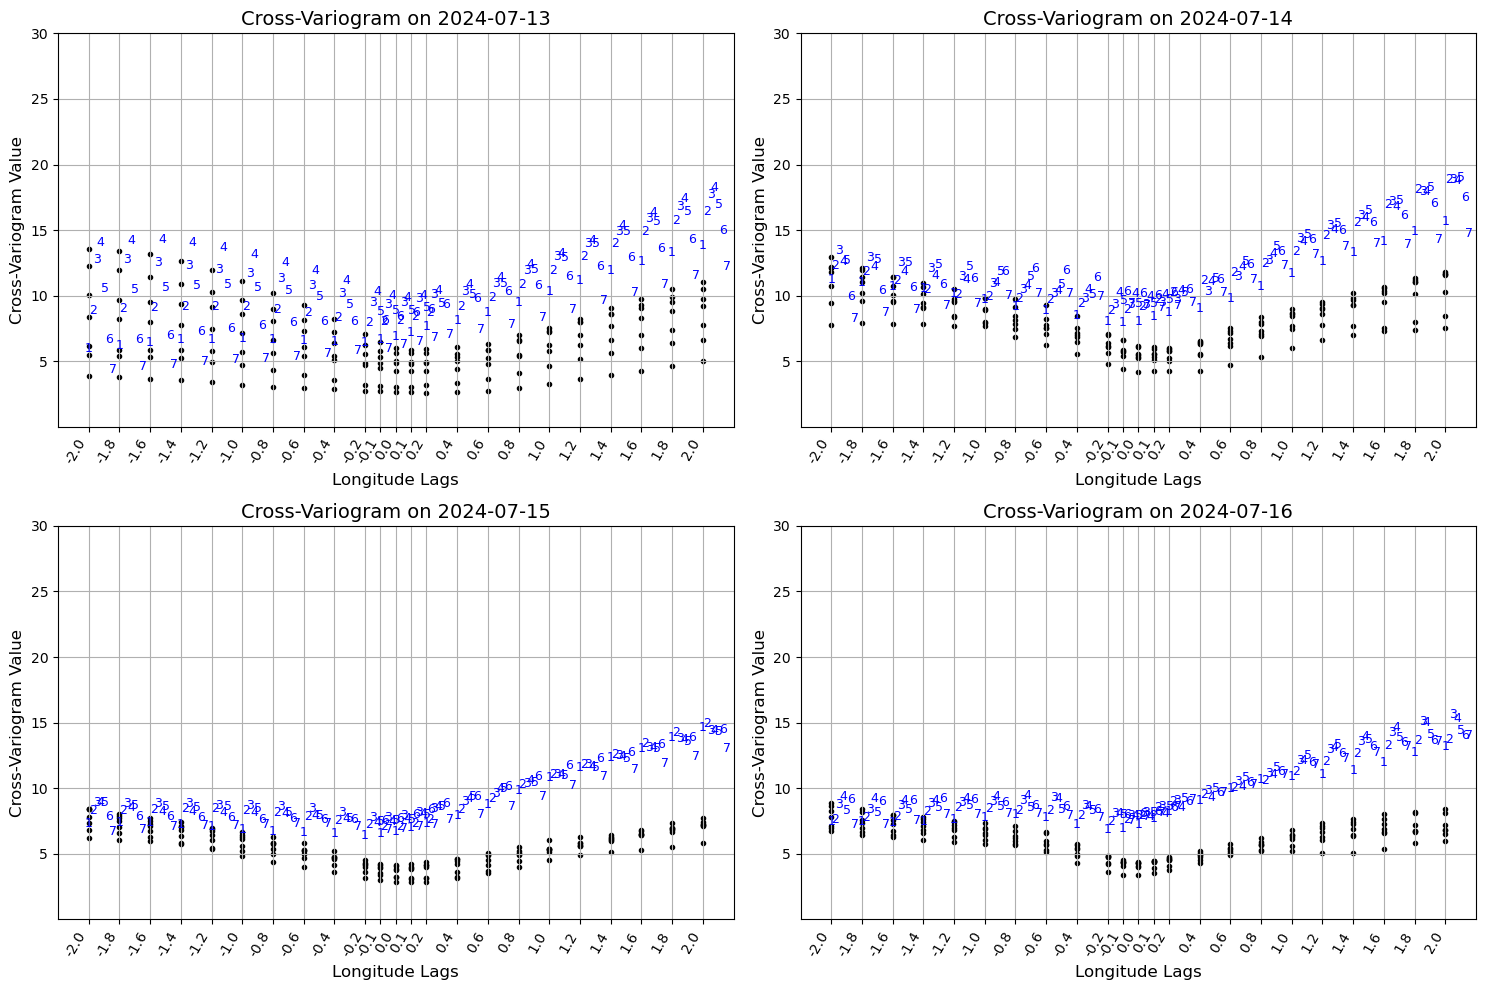

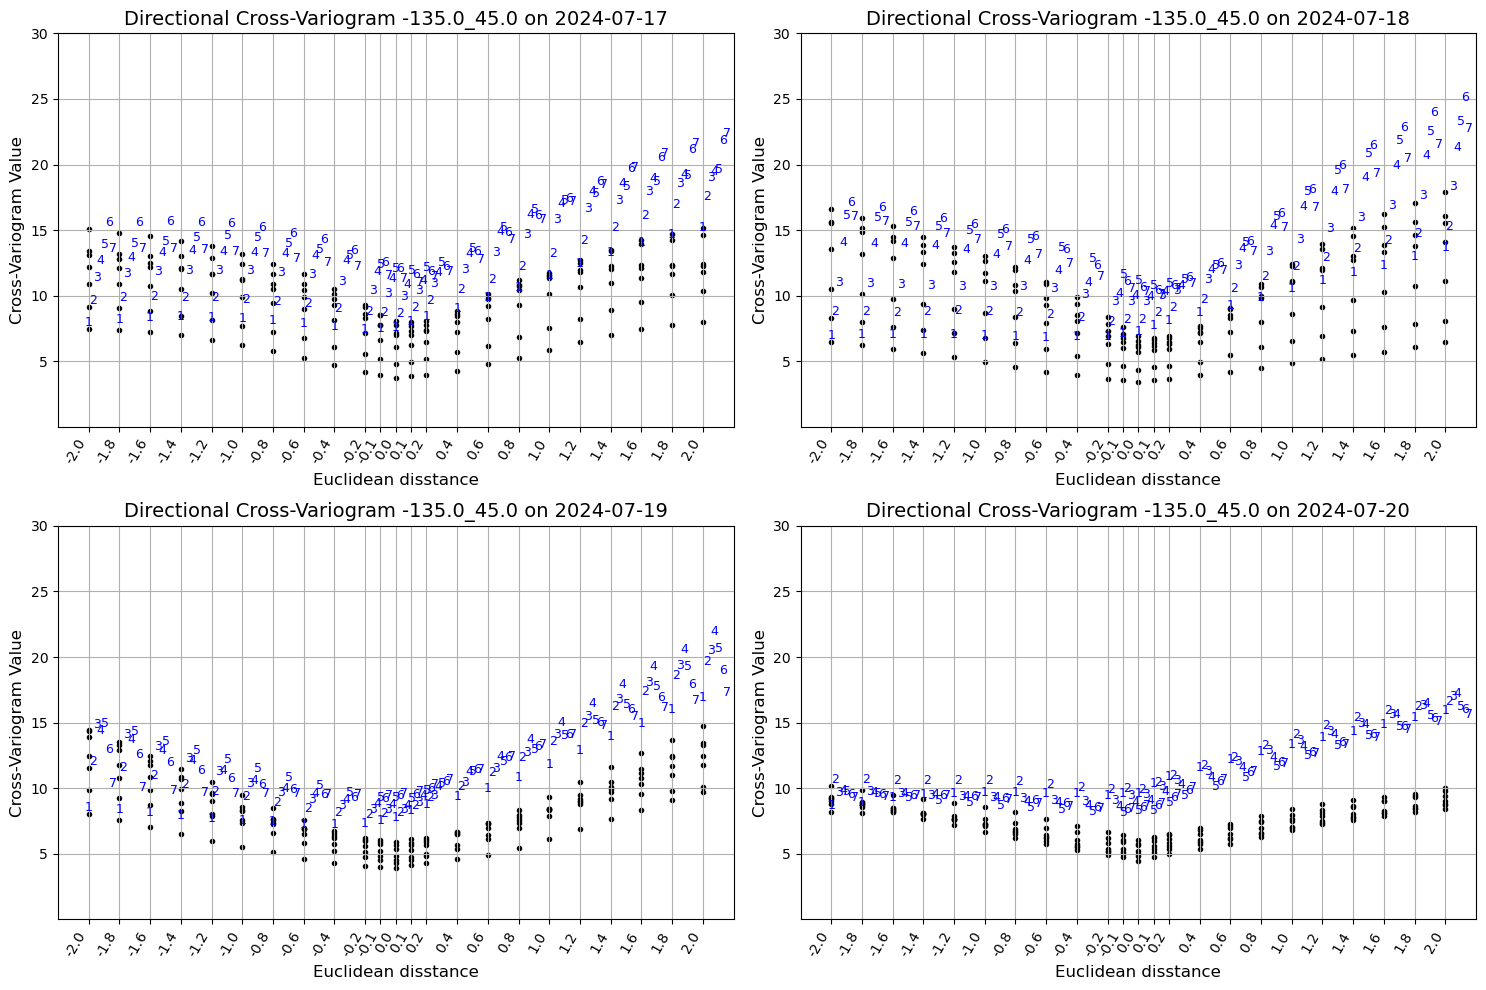

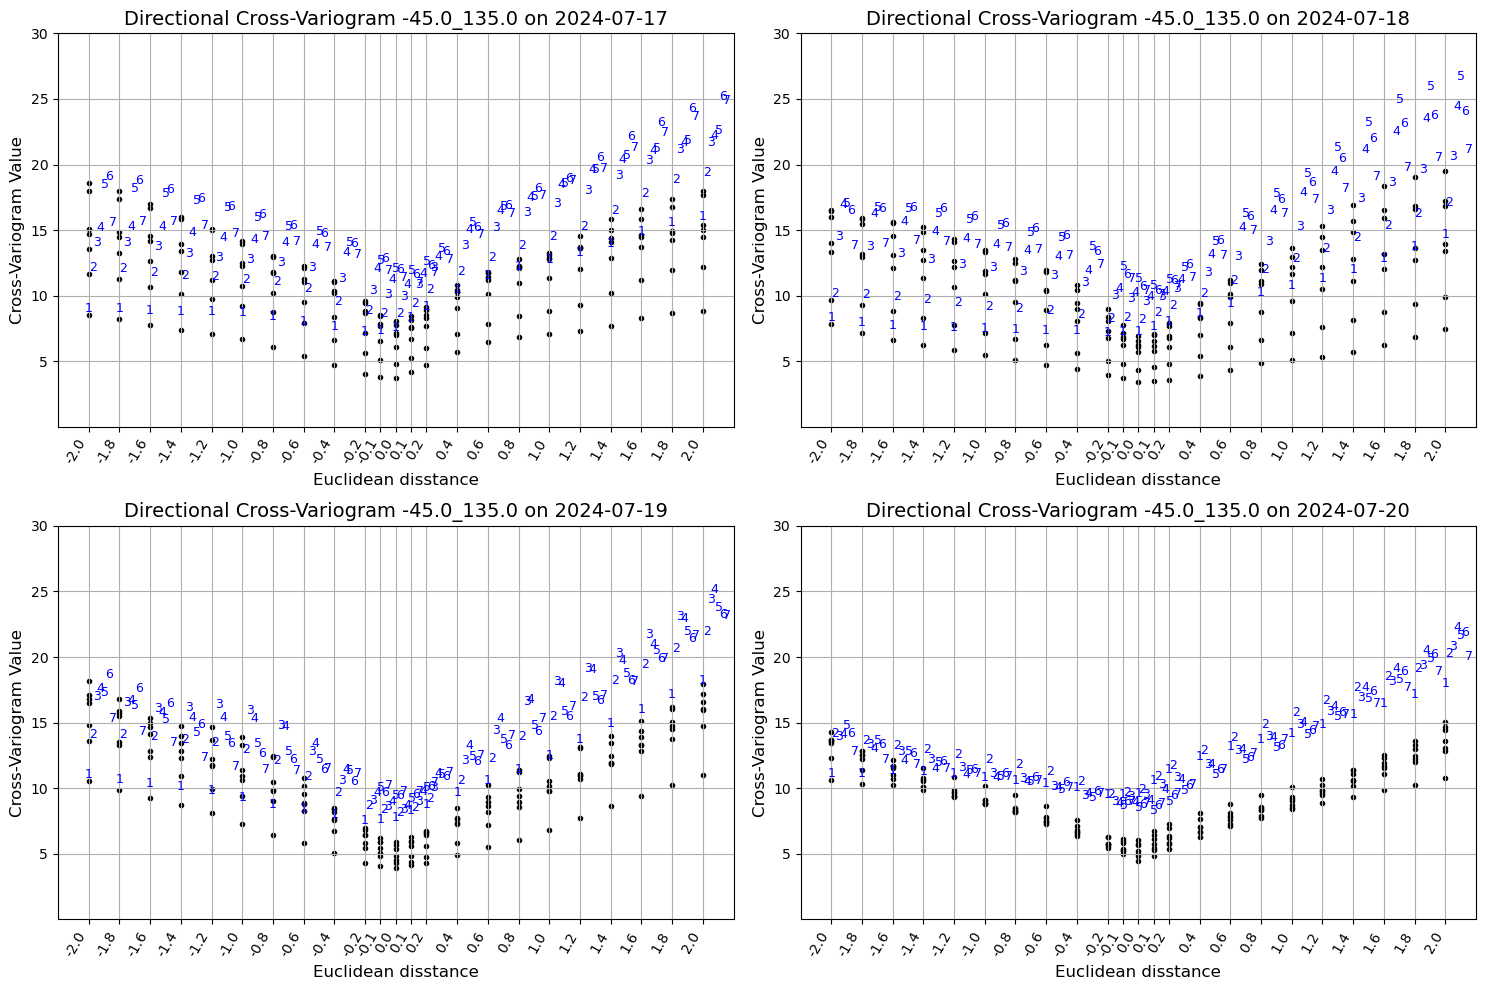

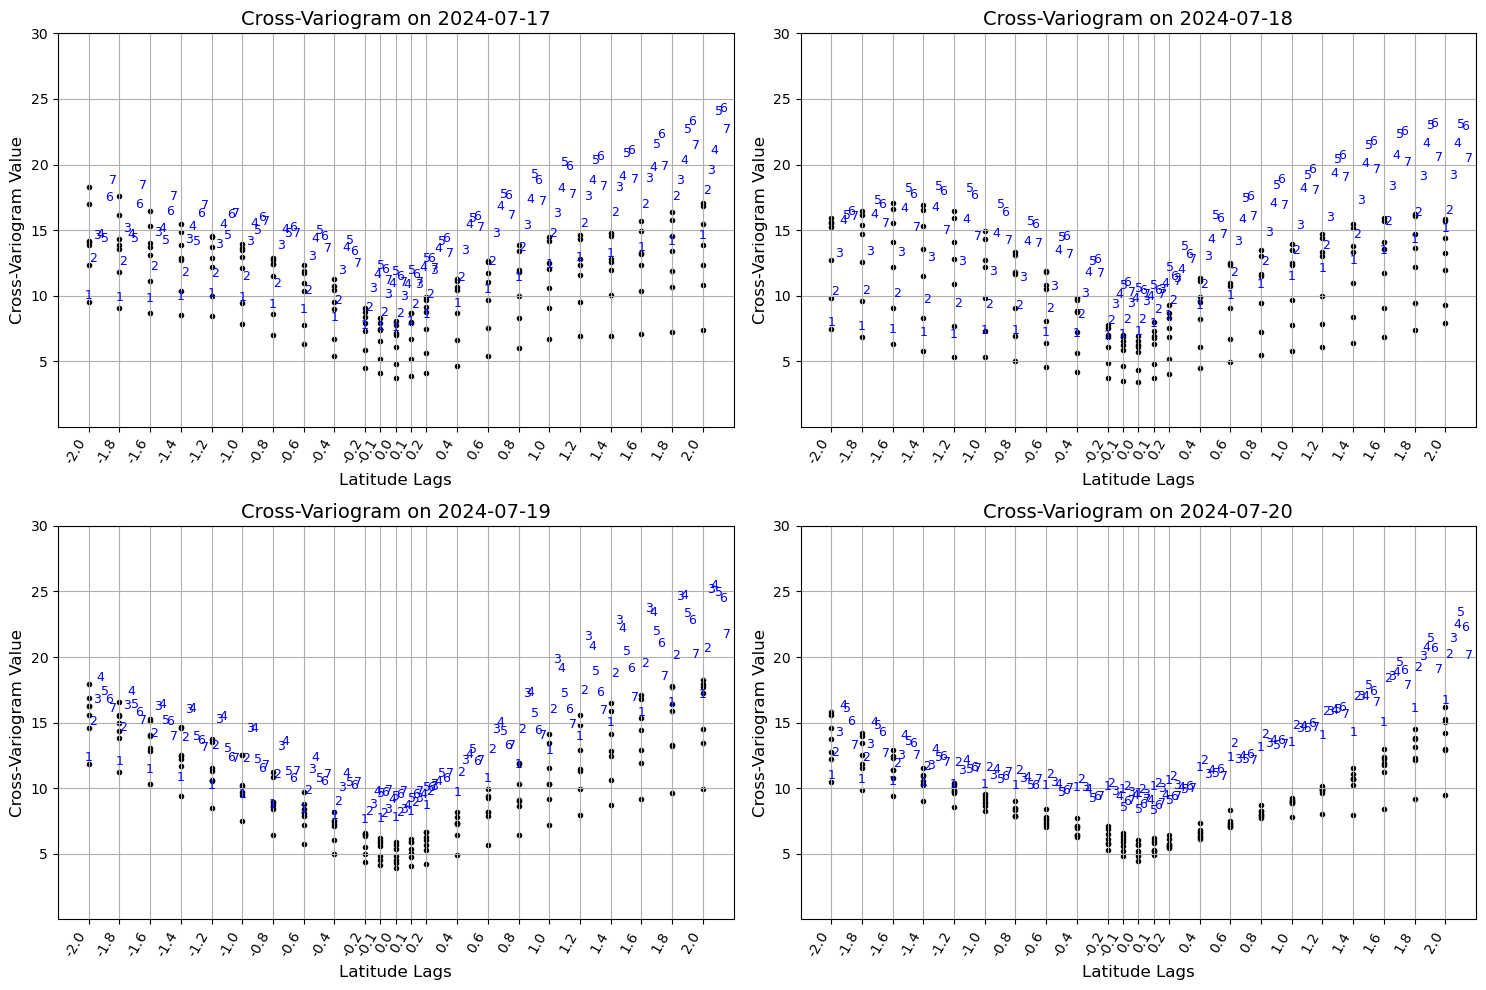

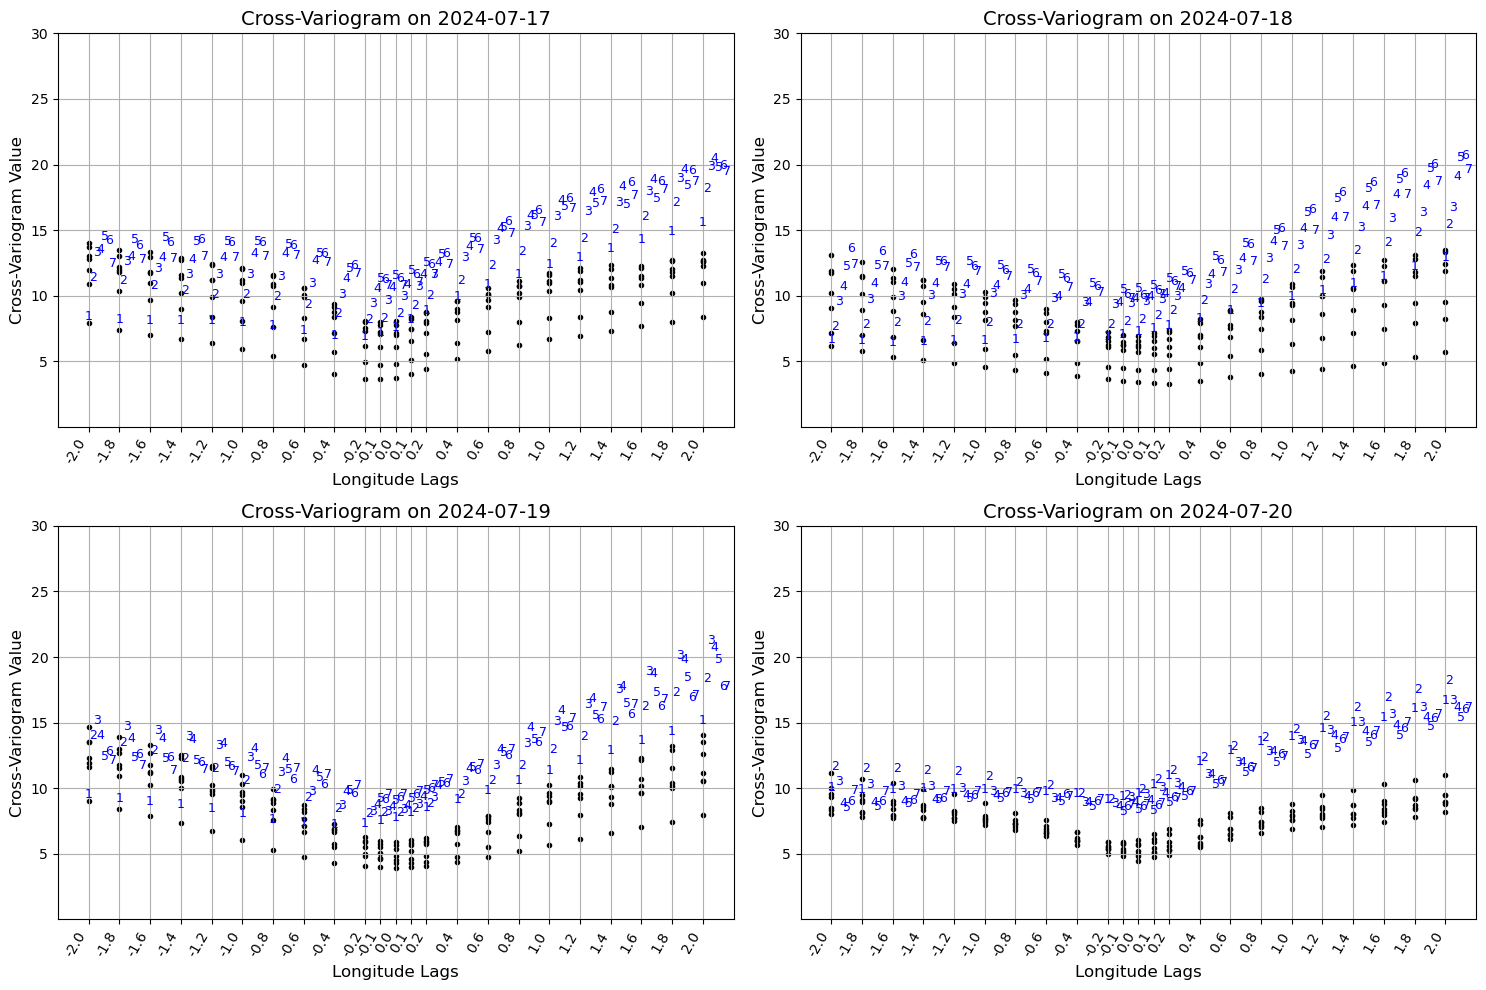

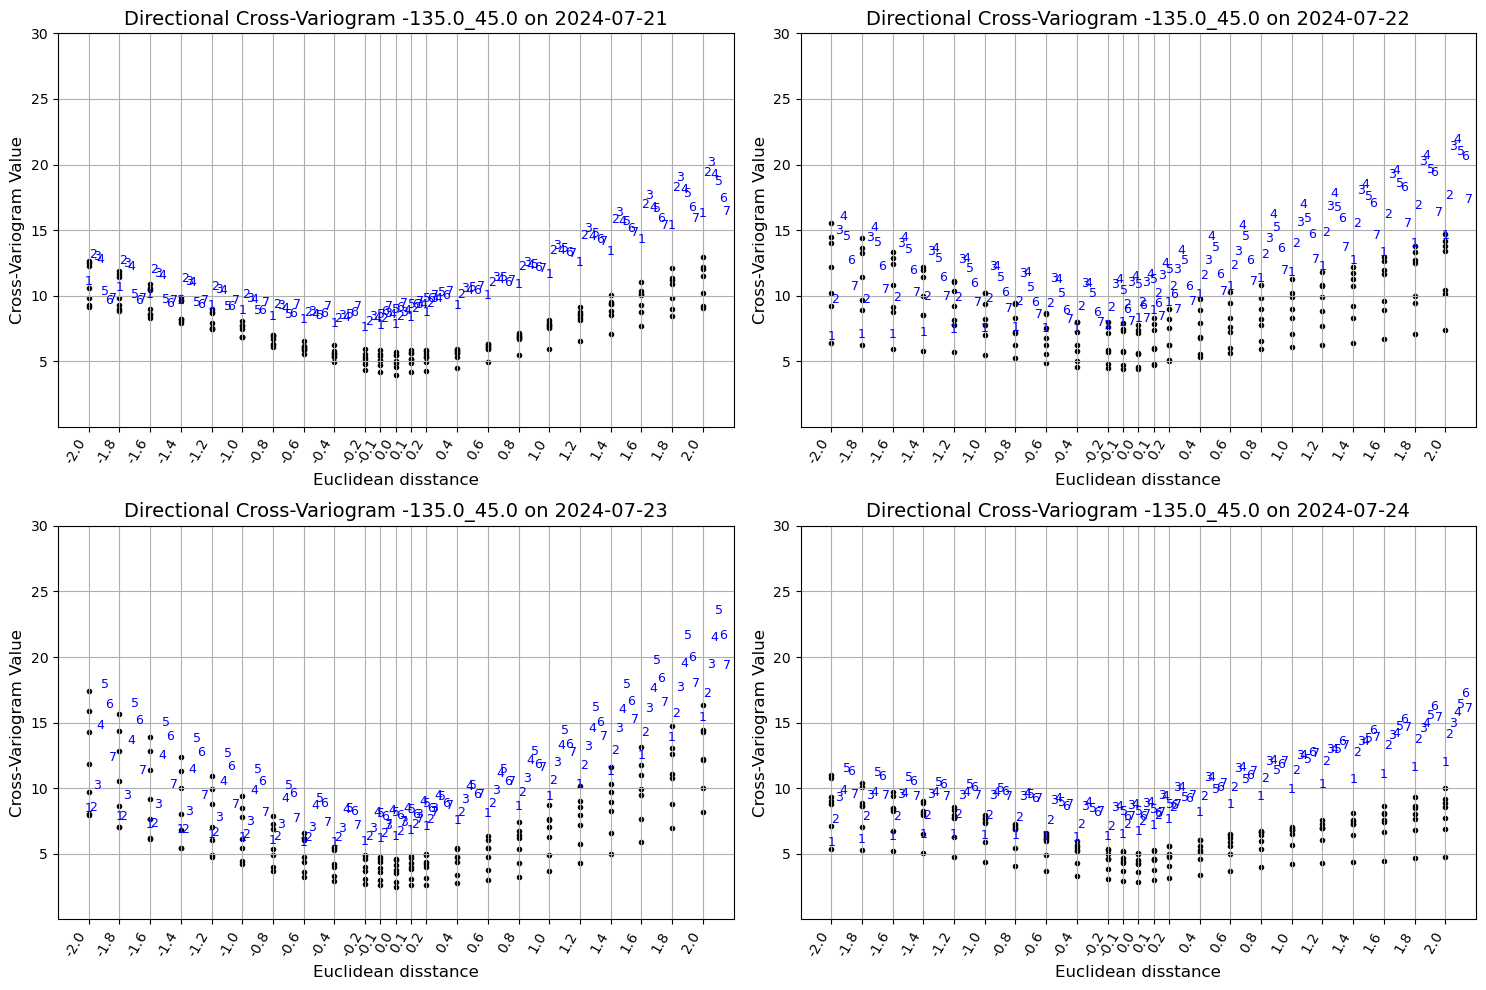

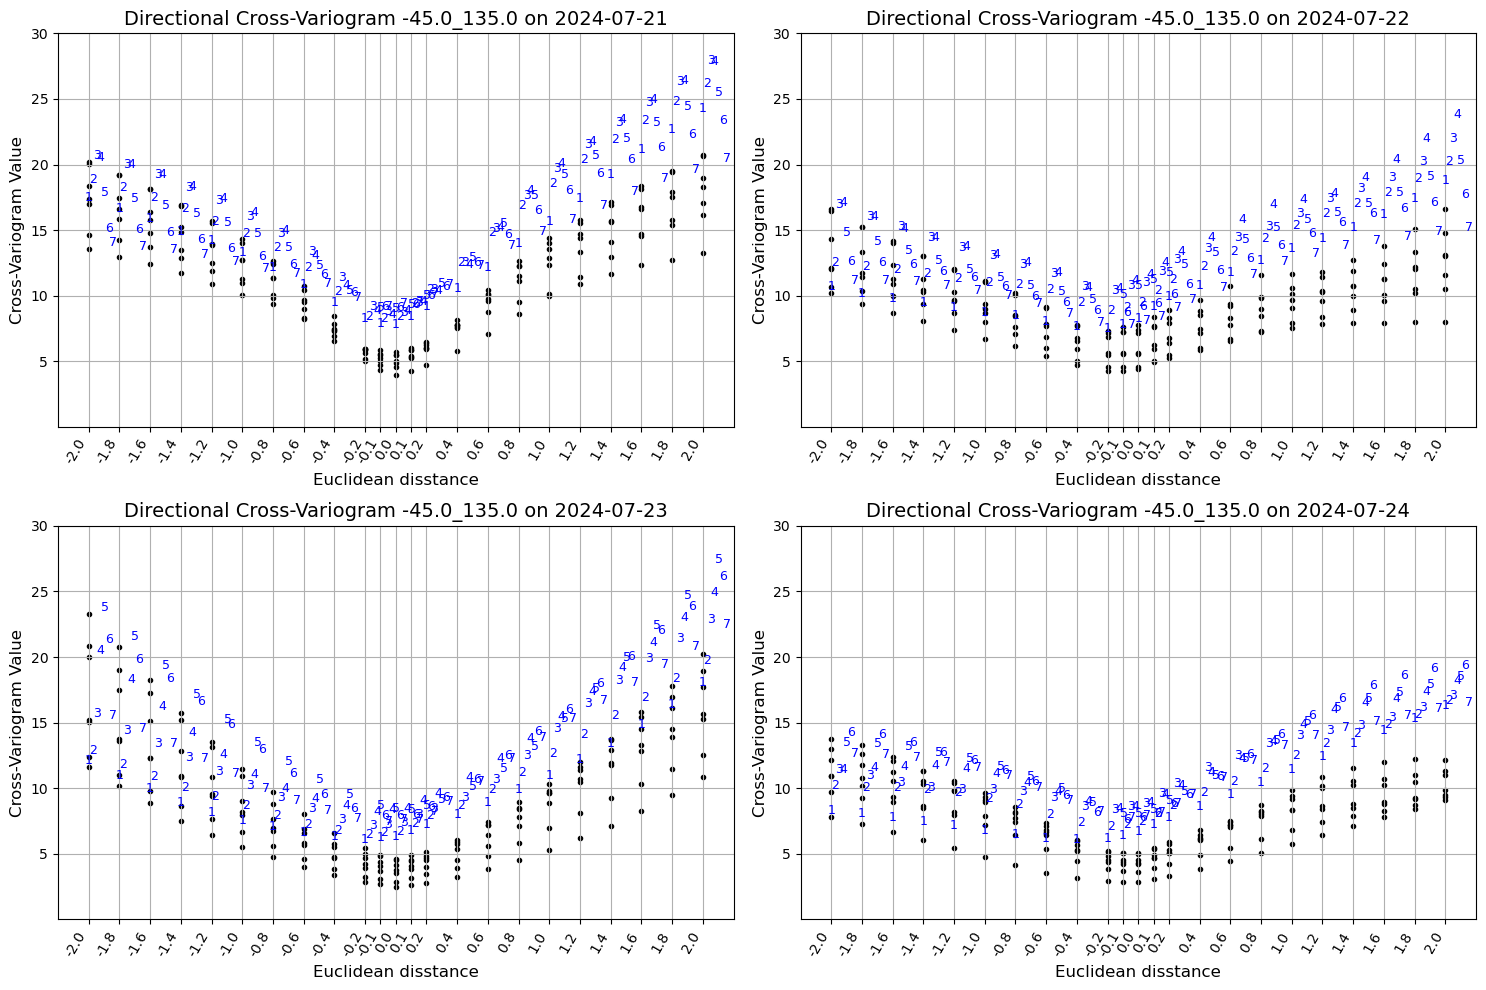

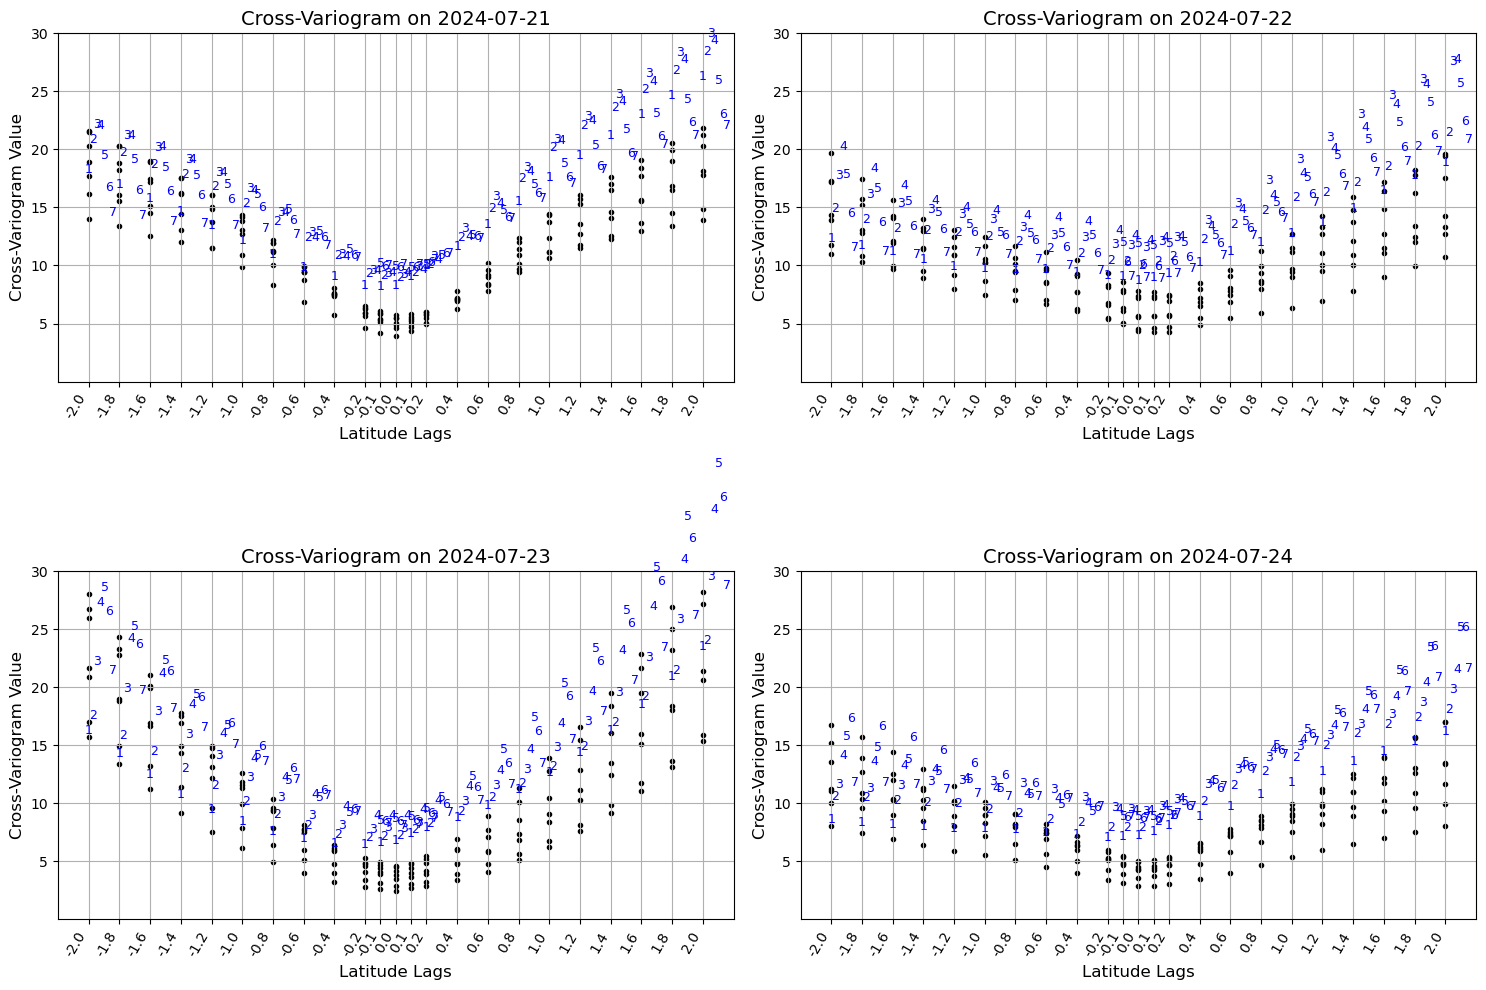

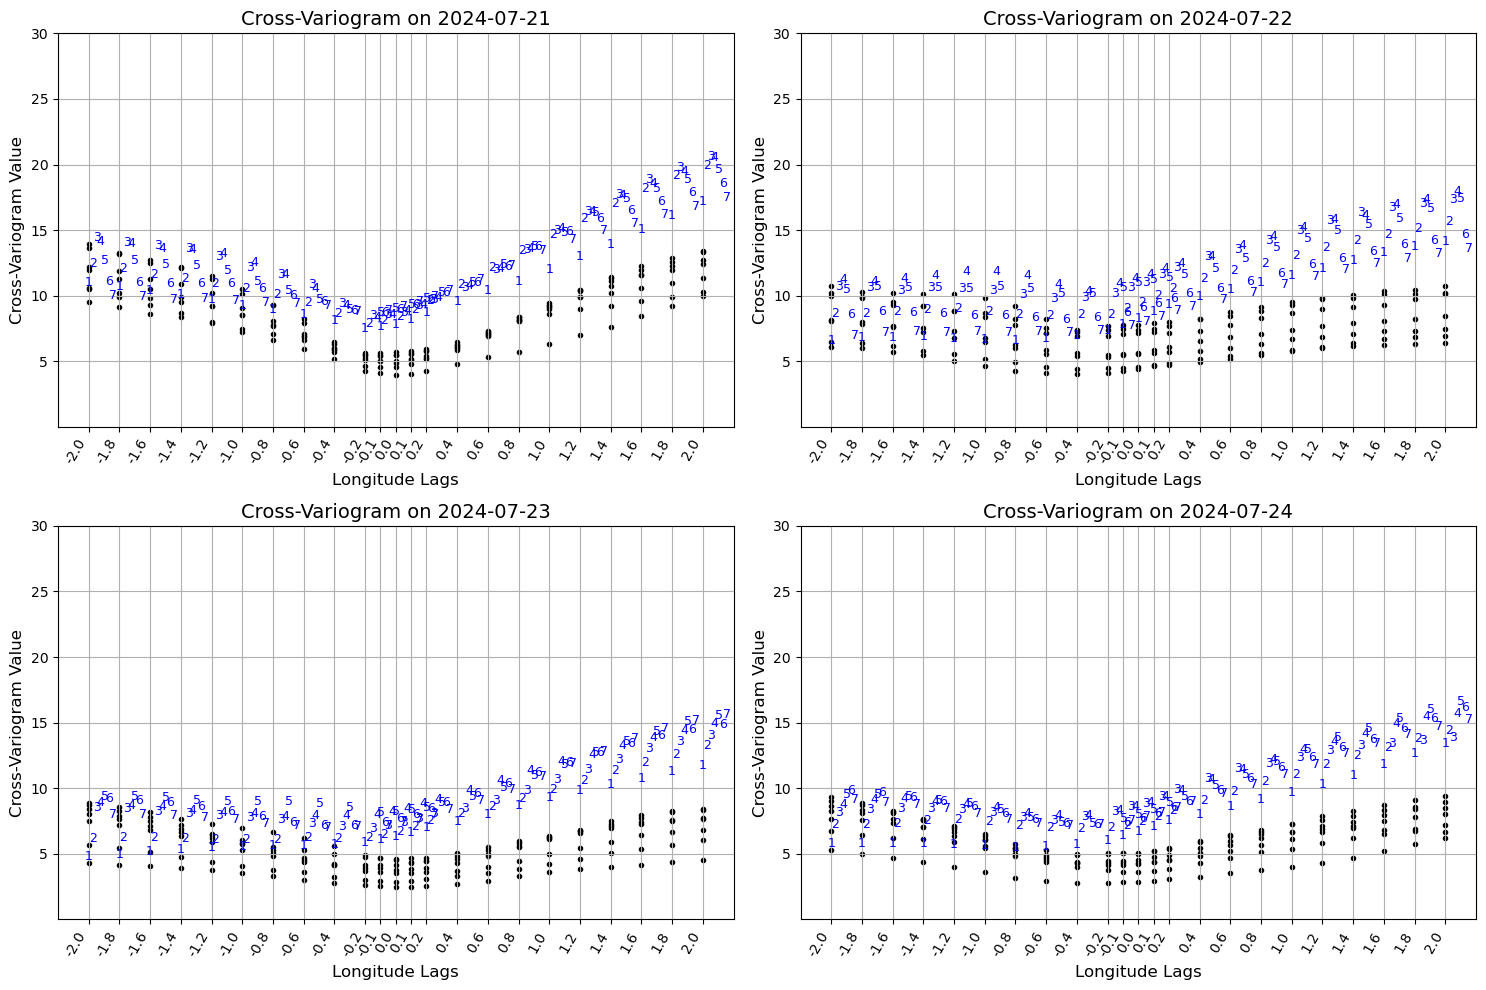

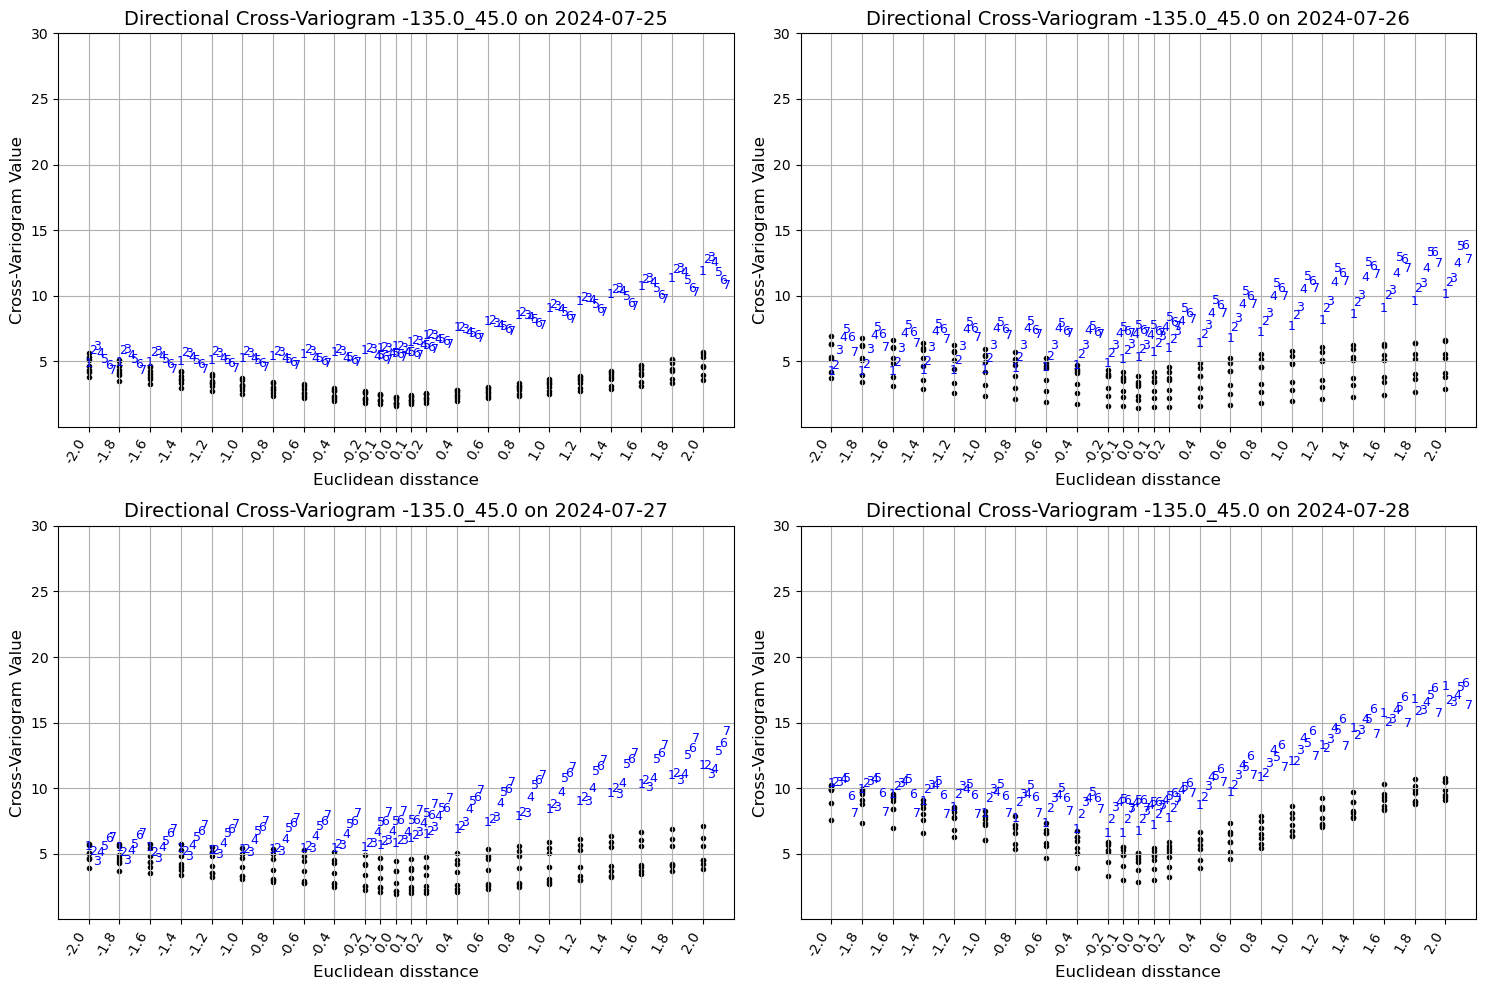

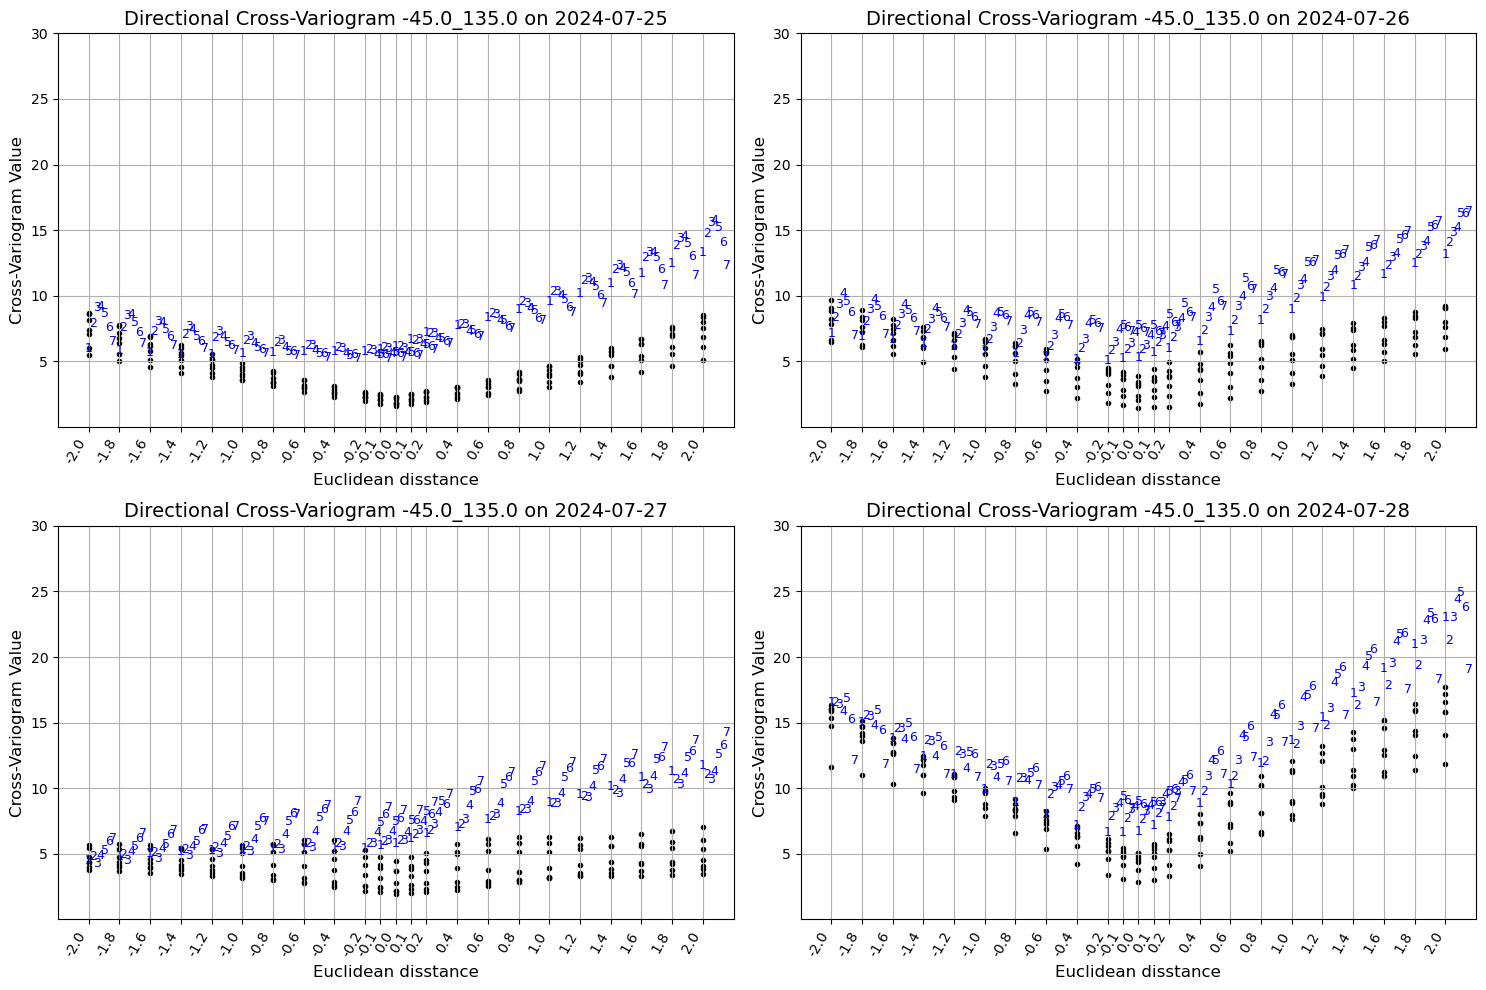

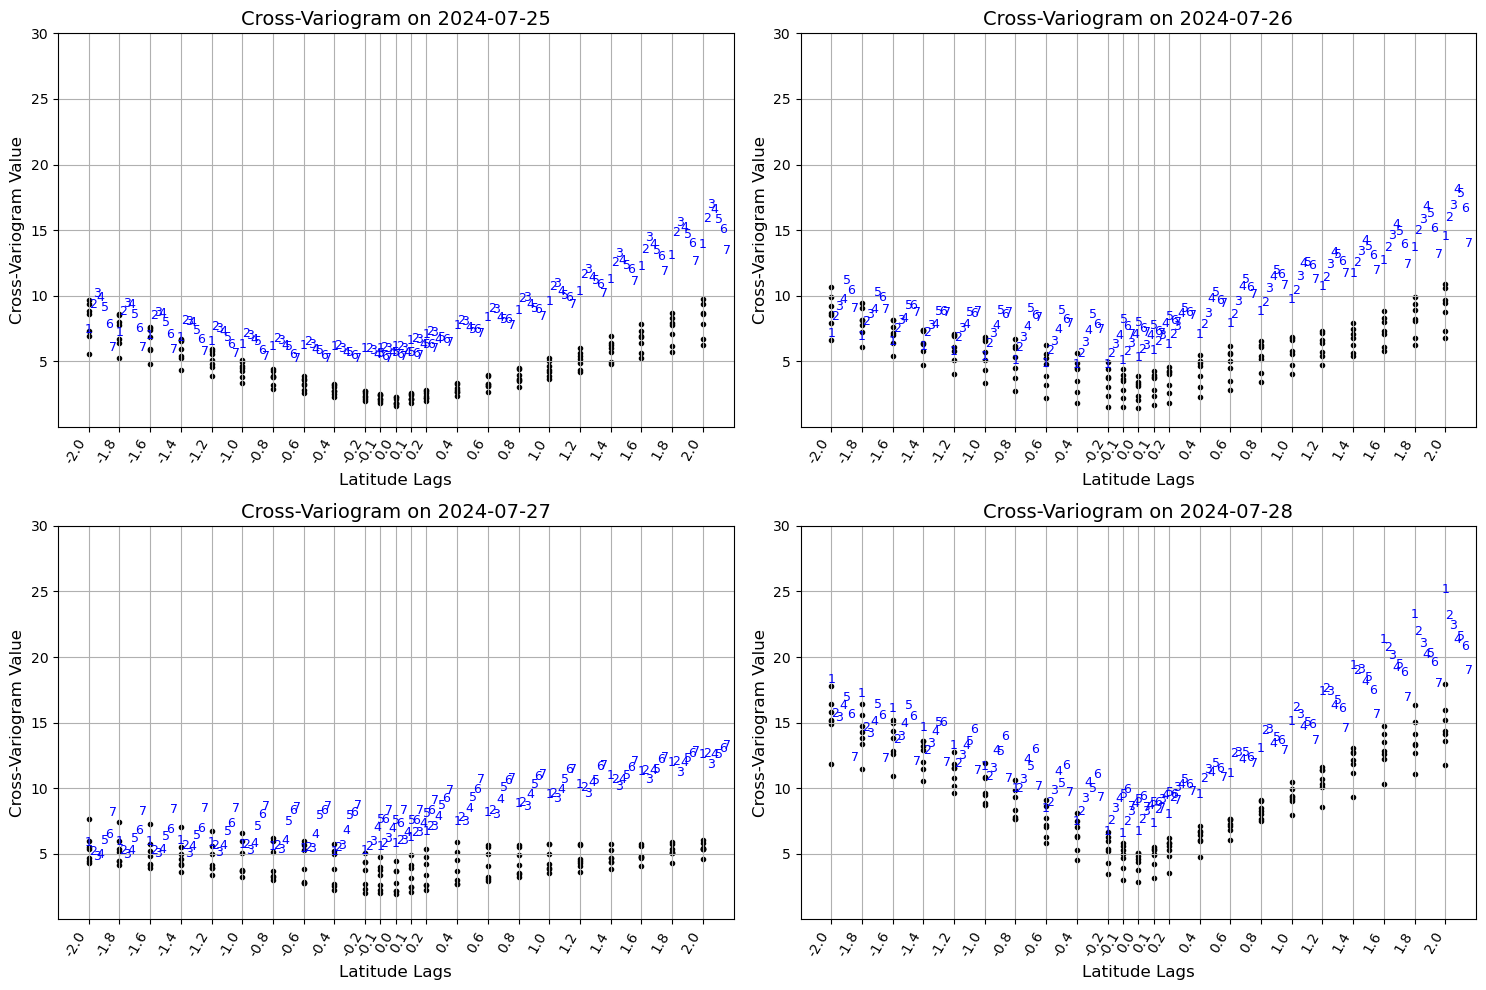

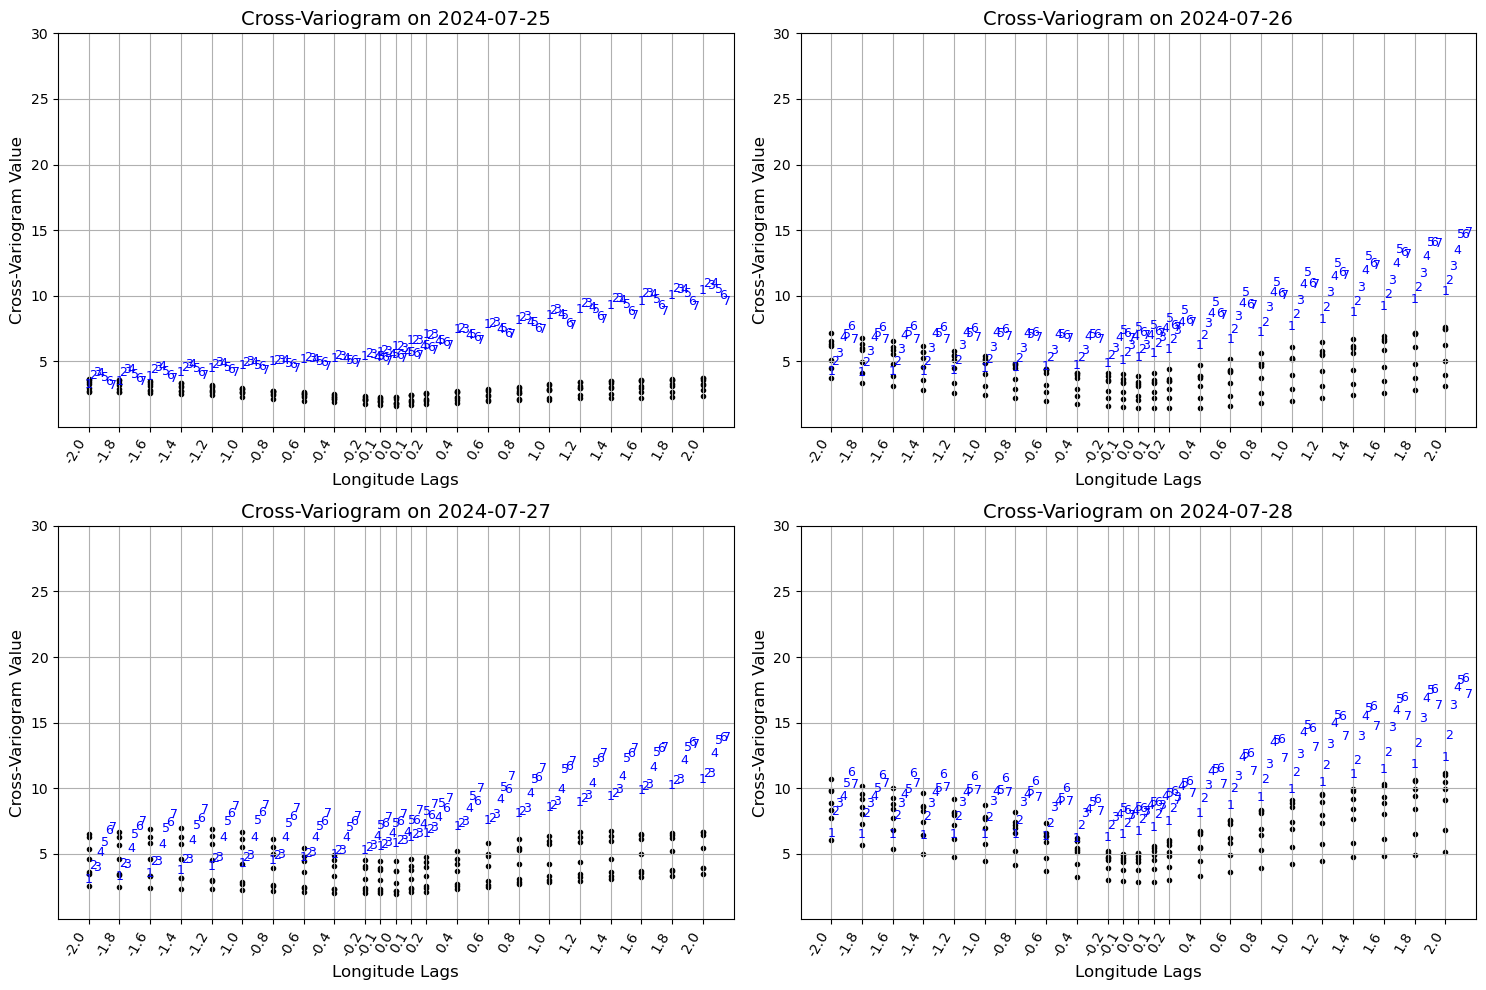

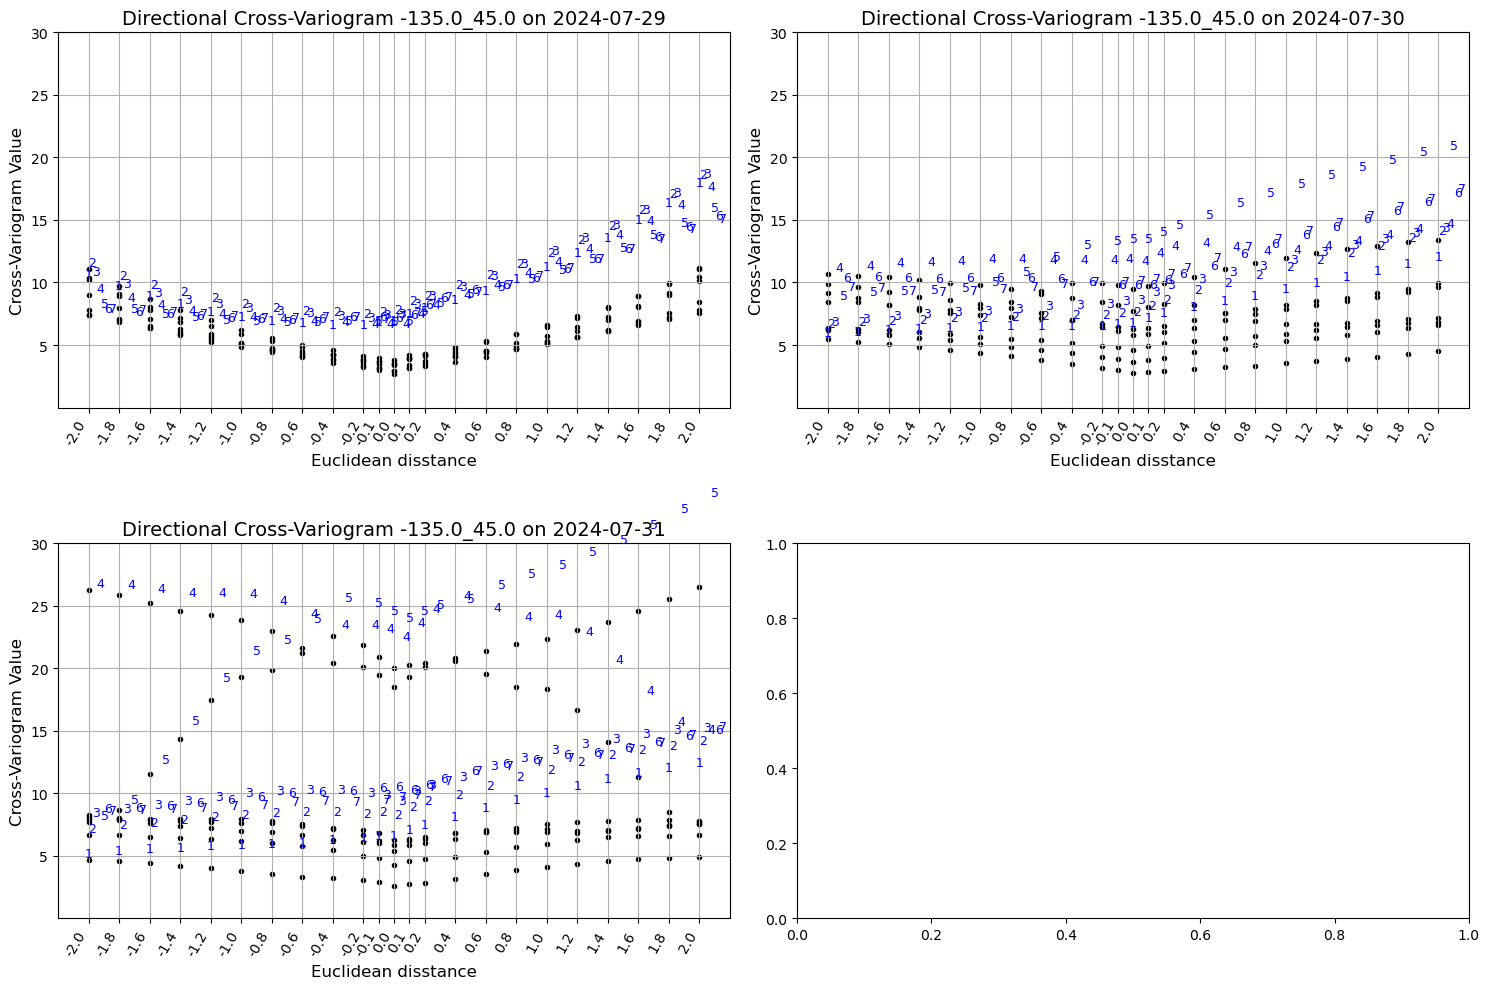

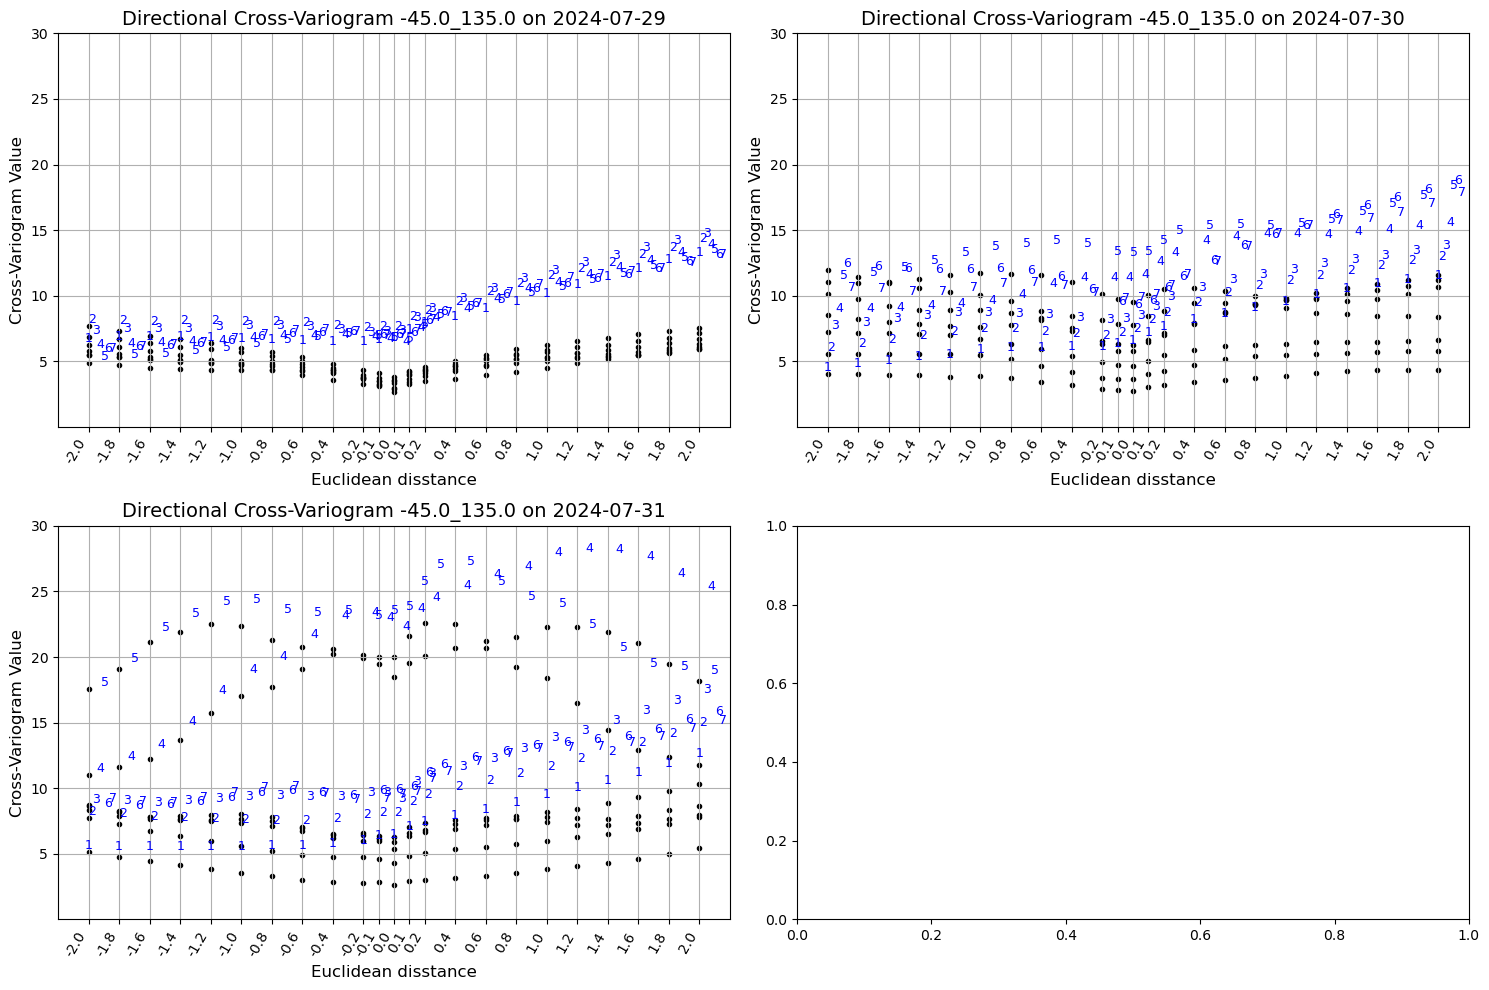

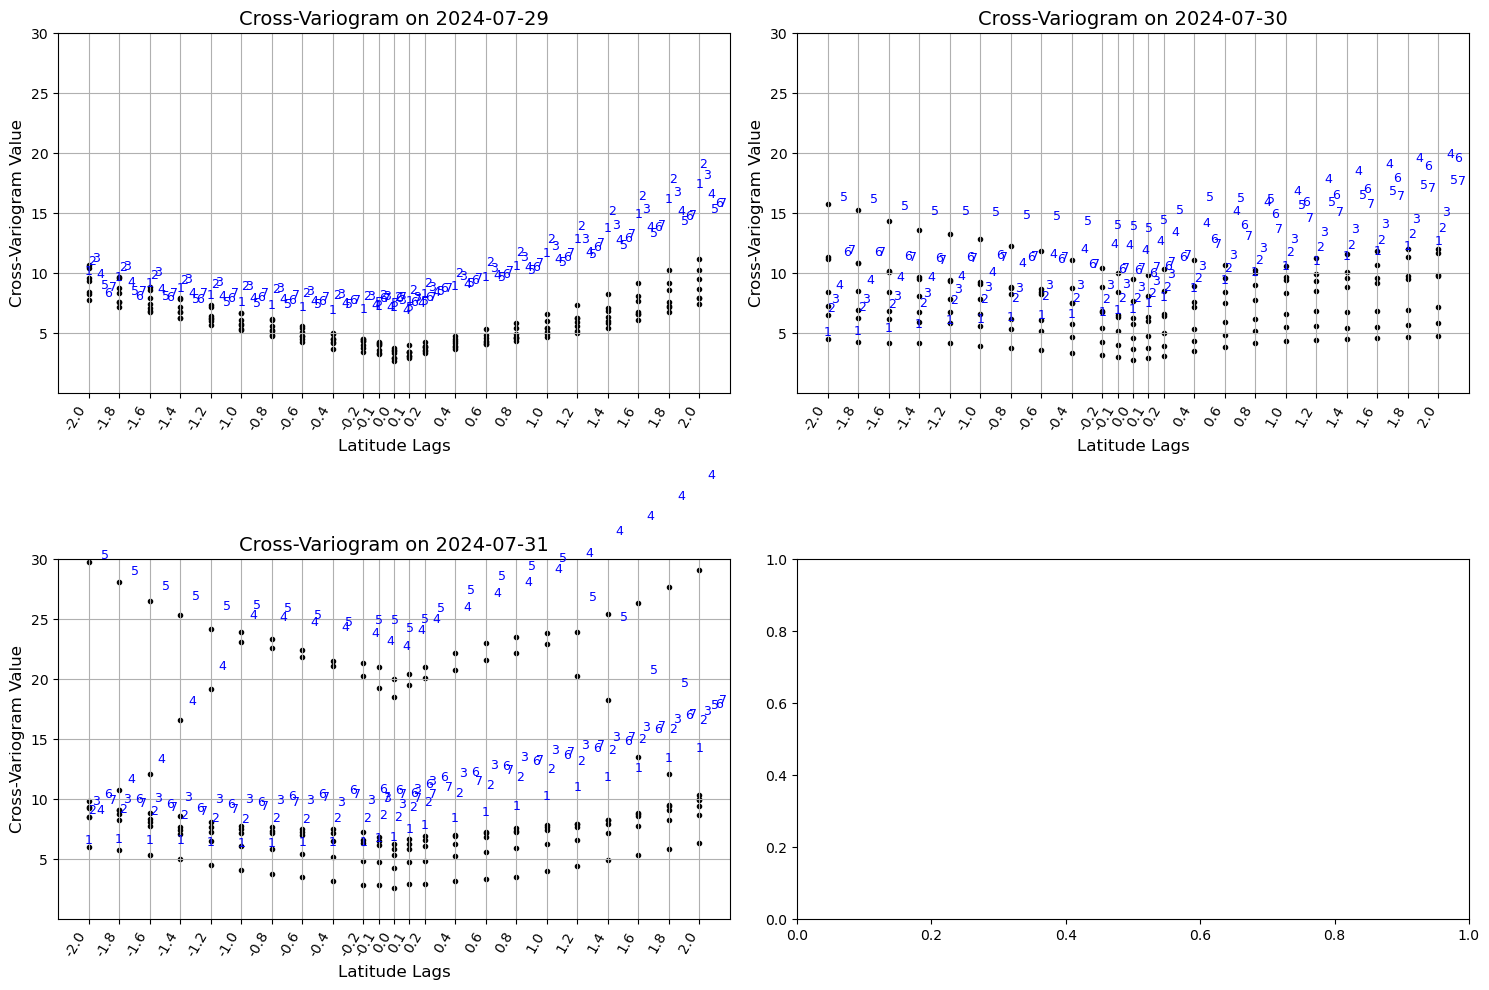

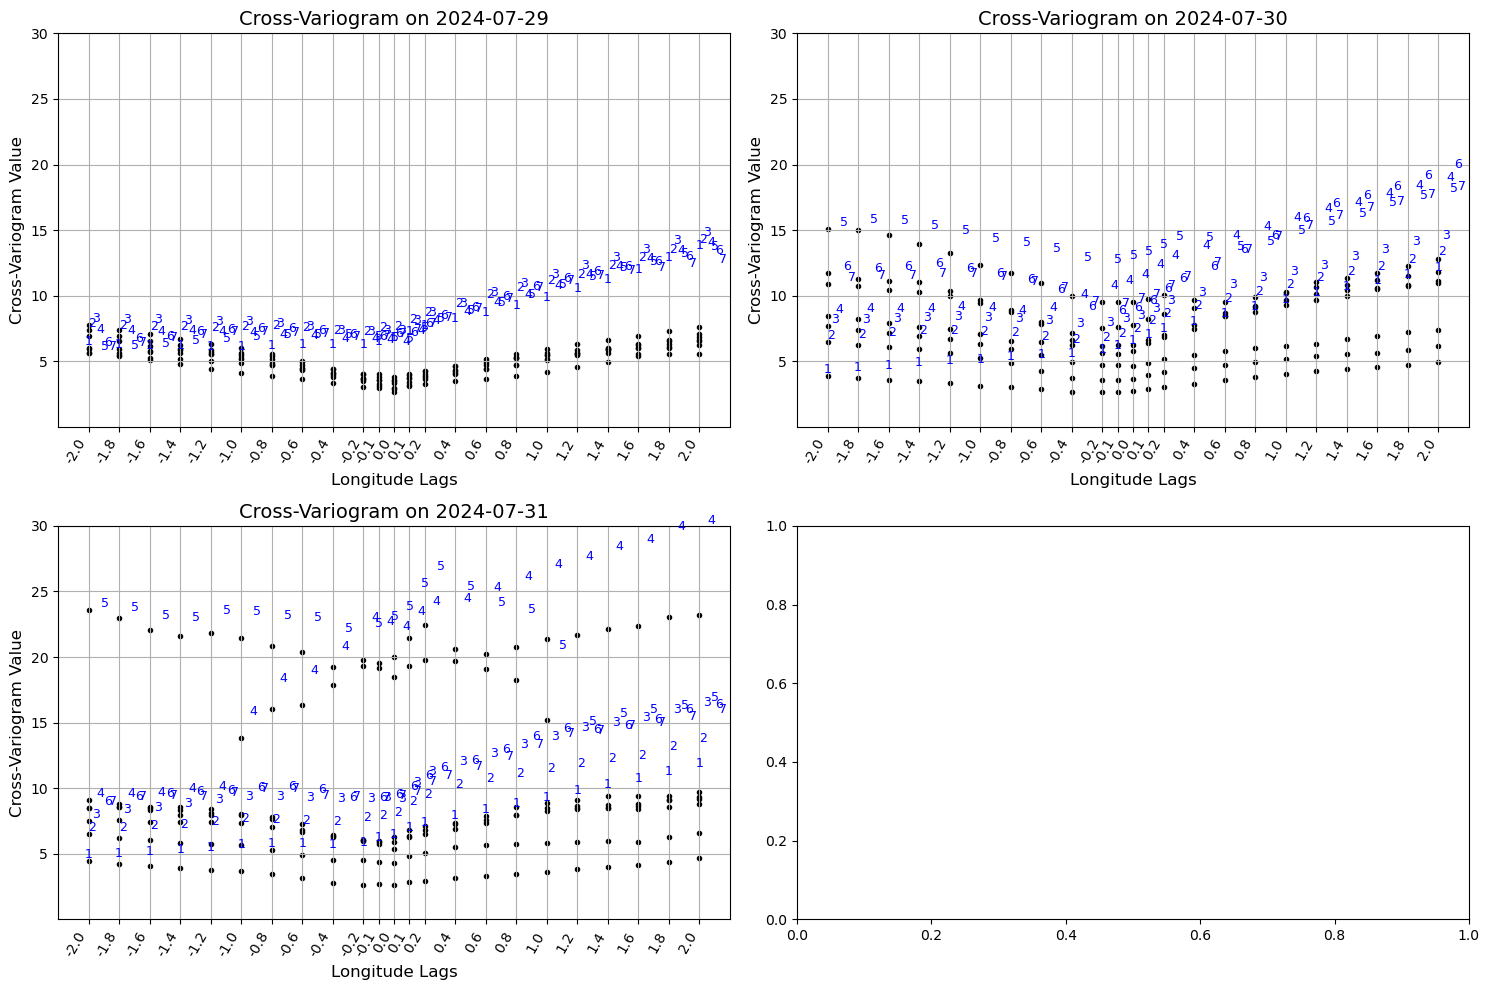

In [9]:
instance_sem = evaluate.CrossVariogram()

# x_values = [-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
dayss = [[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16], [17,18,19,20], [21,22,23,24], [25,26,27,28], [29,30,31]]
x_values = np.concatenate((np.linspace(-2, -0.2, 10), [-0.1, 0, 0.1], np.linspace(0.2, 2, 10)))

for days in dayss:
    tolerance = 0.02
    d45 = np.arctan2(1,1)
    d135 = np.arctan2(-1,-1)  

    # y=x direction
    instance_sem.plot_directional_sem(x_values, d135_45_20000, days, d135, d45)

    # y=-x direction
    dn45 = np.arctan2(-1,1)
    dn135 = np.arctan2(1,-1)
    instance_sem.plot_directional_sem(x_values, dn45_n135_20000, days, dn45, dn135)

    tmp = np.concatenate((np.linspace(-2, -0.2, 10), [-0.1, 0, 0.1], np.linspace(0.2, 2, 10)))
    tolerance = 0.02

    # latitude direction
    deltas = [ ( round(a,1),0 ) for a in tmp]
    instance_sem.plot_lat_sem( d_lat_20000,days,deltas)

    # longitude direction
    deltas = [ (0, round(a,1)) for a in tmp]
    instance_sem.plot_lon_sem( d_lon_20000,days,deltas)


